In [1]:
### Supress the Warnings so that the same is not shown while result outcomes

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataframe libraries
import numpy as np
import pandas as pd

In [3]:
# Visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline 

In [4]:
# Scikit Library
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
## Set display limits
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
#read the dataset
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Understanding the data

In [7]:
# Check the dimensions
df.shape

(1460, 81)

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

In [10]:
## Checking for null values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null.head()

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26


In [12]:
# dataframe with features having null values
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


### Dropping missing value columns which has more than 50% missing values

In [13]:
# we will drop the 'PoolQC','MiscFeature','Alley','Fence' column becuase there are so many missing values and id column is not required
df = df.drop(['PoolQC','MiscFeature','Id','Alley','Fence'],axis=1)

In [14]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtExposure,2.60
BsmtFinType2,2.60


In [15]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
      

In [16]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [17]:
# Numeric columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

### Treating the missing Values 

In [18]:
#Hadle Missingness for Categorical columns (Imputation)
for col in ["FireplaceQu", "GarageCond", "GarageType", "GarageFinish", "GarageQual", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]:
    df[col] = df[col].fillna(df[col].mode()[0])

In [19]:
# Handle Missingness for Numeric columns (Imputation)
for col in ["LotFrontage", "GarageYrBlt"]:
    df[col] = df[col].fillna(df[col].median())

In [20]:
#Deleting rows as Very Low Missingness (Deletion)
df.dropna(subset=["MasVnrArea", "MasVnrType", "Electrical"], inplace=True)

In [21]:
# Confirm that all missing values are addressed
print(df.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [22]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [23]:
df.shape

(1451, 76)

In [24]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,56.933150,69.845624,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1978.445210,1.764990,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,42.350366,22.044429,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,23.989371,0.748728,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
#dropping the following columns that have more than 85% values associated to a specific value
def HighCategoricalValueCount():
    column = []
    categorical_columns = df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

cat_var_removed = HighCategoricalValueCount()

#removing columns with skewed data

df.drop(cat_var_removed, axis = 1, inplace = True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Gd,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,Normal,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,Normal,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,Normal,250000


In [26]:
#dropping the numerical columns that have more than 85% values 

def HighNumericalValueCount():
    column = []
    numerical_columns = df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

num_var_removed = HighNumericalValueCount()
df.drop(num_var_removed, axis = 1, inplace = True)

#dropping MoSold too as we will not need this
df.drop(['MoSold'], axis = 1, inplace = True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Gd,Attchd,2003.0,RFn,2,548,0,61,2008,Normal,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,2007,Normal,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,2008,Normal,250000


In [27]:
#Create a new column named Remodel to determine whether the house has been remodelled or not based on the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['Remodel'] = df.apply(checkForRemodel, axis=1)
df.head()    

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SaleCondition,SalePrice,Remodel
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Gd,Attchd,2003.0,RFn,2,548,0,61,2008,Normal,208500,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,2007,Normal,181500,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,2008,Normal,223500,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2006,Abnorml,140000,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,2008,Normal,250000,0


In [28]:
df.shape

(1451, 49)

In [29]:
#creating a column named BuildingAge to determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuildingAge'] = df.apply(getBuiltOrRemodelAge, axis=1)
df.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SaleCondition,SalePrice,Remodel,BuildingAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Gd,Attchd,2003.0,RFn,2,548,0,61,2008,Normal,208500,0,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,2007,Normal,181500,0,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,2008,Normal,223500,1,6
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2006,Abnorml,140000,1,36
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,2008,Normal,250000,0,8


In [30]:
#creating another column indicating if the garage is old or new
#we can assign old (0) if Garage Yr Built less than 2000 or else else new(1) 

def GarageNewOld(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(GarageNewOld)
df.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SaleCondition,SalePrice,Remodel,BuildingAge,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Gd,Attchd,2003.0,RFn,2,548,0,61,2008,Normal,208500,0,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,2007,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,2008,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2006,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,2008,Normal,250000,0,8,1


In [31]:
#dropping YearBuilt, YearRemodAdd, YrSold and GarageYrBlt as we have features based on these above

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [32]:
#checking for duplicate values in the dataset

df[df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,Remodel,BuildingAge,OldOrNewGarage


In [33]:
#checking outliers at different points

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Remodel,BuildingAge,OldOrNewGarage
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,56.933150,69.845624,10507.808408,6.093728,5.579600,103.75672,442.274983,567.197105,1056.310131,1161.551344,346.742247,1514.174363,0.423846,1.562371,0.381116,2.866988,6.516885,0.612681,1.764990,472.525155,94.412819,46.422467,180624.101999,0.476912,23.055134,0.271537
std,42.350366,22.044429,9992.987081,1.381467,1.113415,181.10815,455.369276,442.209192,437.914609,385.002532,436.453277,525.799521,0.518842,0.550301,0.502574,0.815086,1.626576,0.643443,0.748728,214.171752,125.436852,66.060150,79312.128273,0.499639,20.647244,0.444906
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7537.500000,5.000000,5.000000,0.00000,0.000000,222.000000,795.000000,882.000000,0.000000,1128.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,327.500000,0.000000,0.000000,129900.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,0.00000,381.000000,479.000000,991.000000,1086.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,478.000000,0.000000,24.000000,162500.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,166.00000,707.000000,808.000000,1297.500000,1391.000000,728.000000,1776.000000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14375.000000,8.000000,7.000000,335.00000,1064.000000,1232.000000,1602.000000,1680.000000,954.000000,2158.000000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,3.000000,757.000000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17308.500000,8.000000,8.000000,456.00000,1272.000000,1468.000000,1749.000000,1827.000000,1141.500000,2464.000000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,3.000000,849.000000,335.000000,173.000000,325812.000000,1.000000,58.000000,1.000000
99%,190.000000,137.500000,37802.000000,10.000000,9.000000,792.00000,1572.500000,1797.500000,2155.500000,2212.000000,1420.000000,3126.000000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,3.000000,1004.500000,506.000000,286.000000,439390.000000,1.000000,60.000000,1.000000


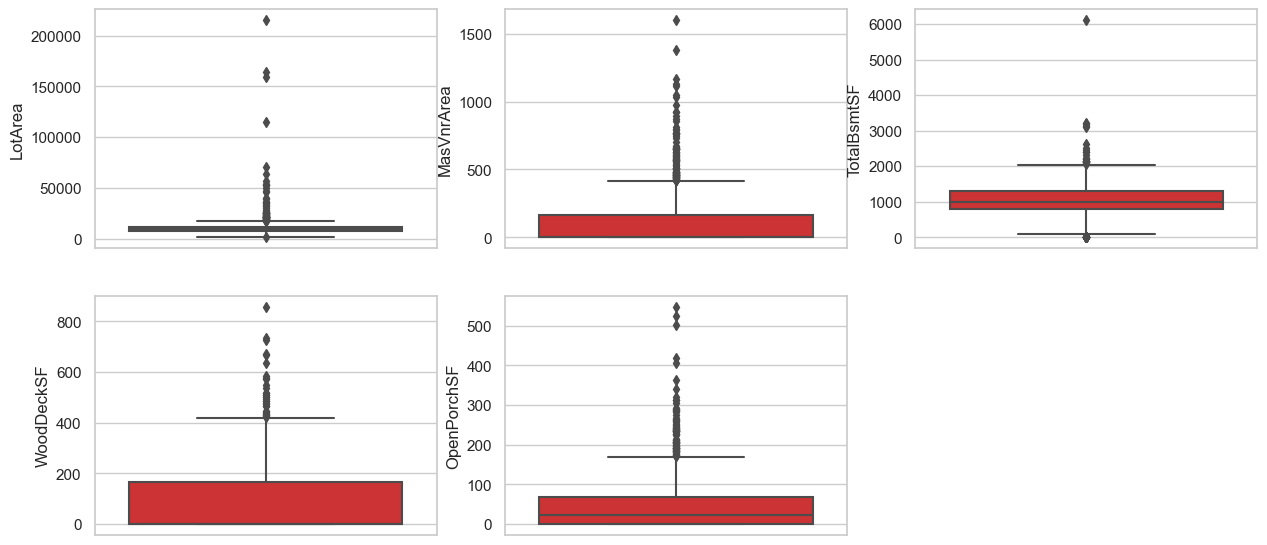

In [34]:
#checking for outliers in the numerical variables using pairplot

plt.figure(figsize=(15, 18))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set1', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set1', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set1', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set1', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set1', data = df)
plt.show()

In [35]:
#removing outliers in these numerical variables ie the values found above 98%

#removing values beyond 98% for MasVnrArea

MasVnrArea_outlier = df['MasVnrArea'].quantile(0.98)
df = df[df["MasVnrArea"] < MasVnrArea_outlier]

#removing values beyond 99% for WoodDeckSF

WoodDeckSF_outlier = df['WoodDeckSF'].quantile(0.99)
df = df[df["MasVnrArea"] < WoodDeckSF_outlier]

#removing values beyond 98% for LotArea

LotArea_outlier = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < LotArea_outlier]

#removing values beyond 99% for OpenPorchSF

OpenPorchSF_outlier = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < OpenPorchSF_outlier]

#removing values beyond 99% for TotalBsmtSF

TotalBsmtSF_outlier = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < TotalBsmtSF_outlier]

## Performing EDA

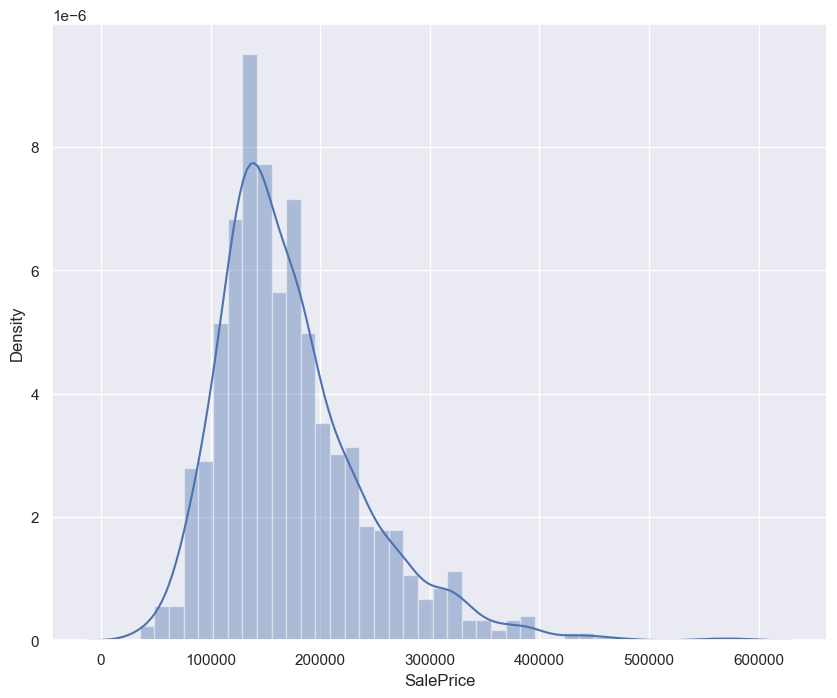

In [36]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

The target variable is right skewed

In [37]:
## Check the skewness of target variable
df['SalePrice'].skew()

1.3307371026272796

The target variable is highly skewed 

In [38]:
## Check the kurtosis of target variable
df['SalePrice'].kurt()

3.0568695508774297

The distribution of the target variable is highly peaked 

In [39]:
## Log transform the target variable
df['SalePrice'] = np.log(df['SalePrice'])

In [40]:
## Check the skewness of target variable again
df['SalePrice'].skew()

-0.0477896722919141

In [41]:
## Check the kurtosis of target variable again
df['SalePrice'].kurt()

0.6241627514327481

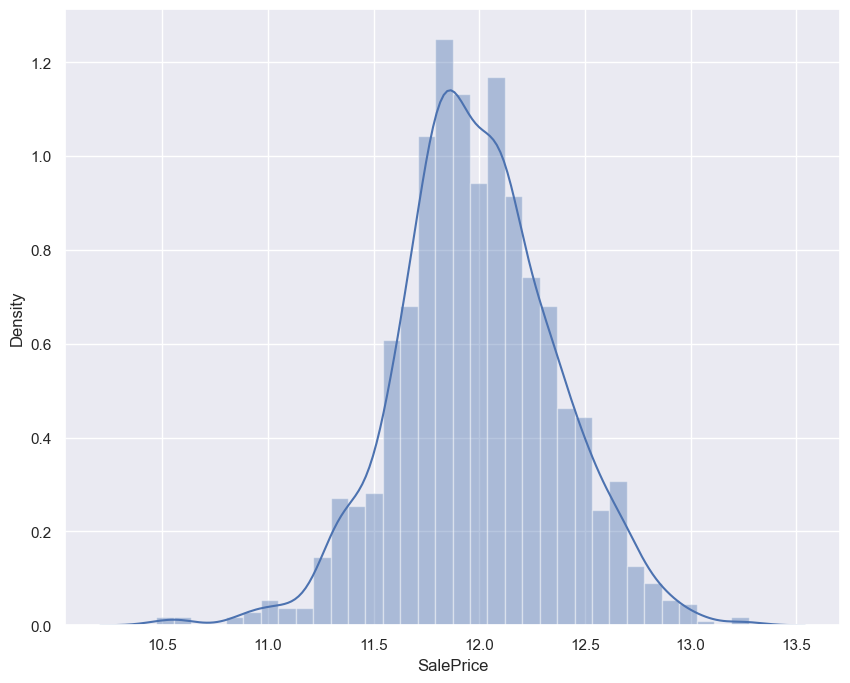

In [42]:
## Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

In [43]:
## Divide the dataframe df into numerical and categorical columns for EDA

## Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Remodel,BuildingAge,OldOrNewGarage
0,60,65.0,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,12.247694,0,5,1
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,12.109011,0,31,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,12.317167,1,6,1
3,70,60.0,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,11.849398,1,36,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,1053,2198,1,2,1,4,9,1,3,836,192,84,12.429216,0,8,1


In [44]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleCondition
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Gd,Attchd,RFn,Normal
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn,Normal
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn,Normal
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf,Abnorml
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn,Normal


### Visualizing Numerical columns

<Figure size 1000x500 with 0 Axes>

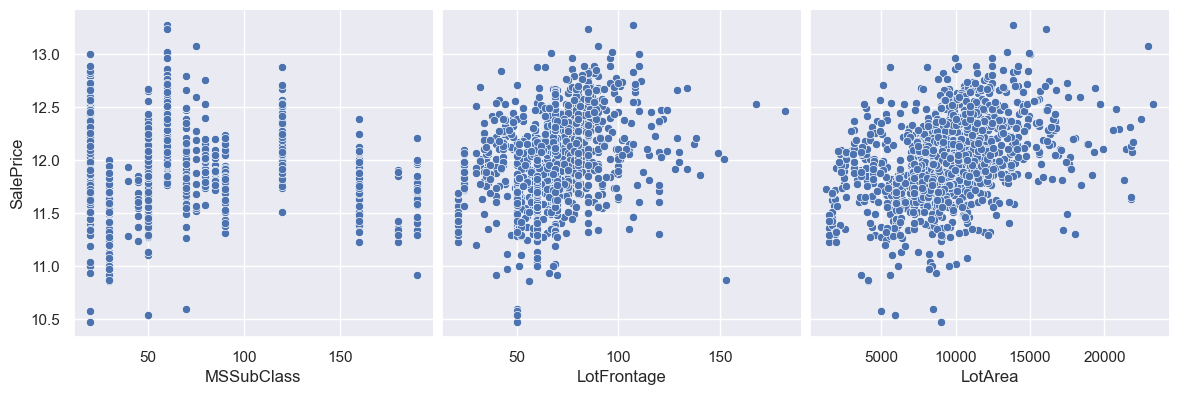

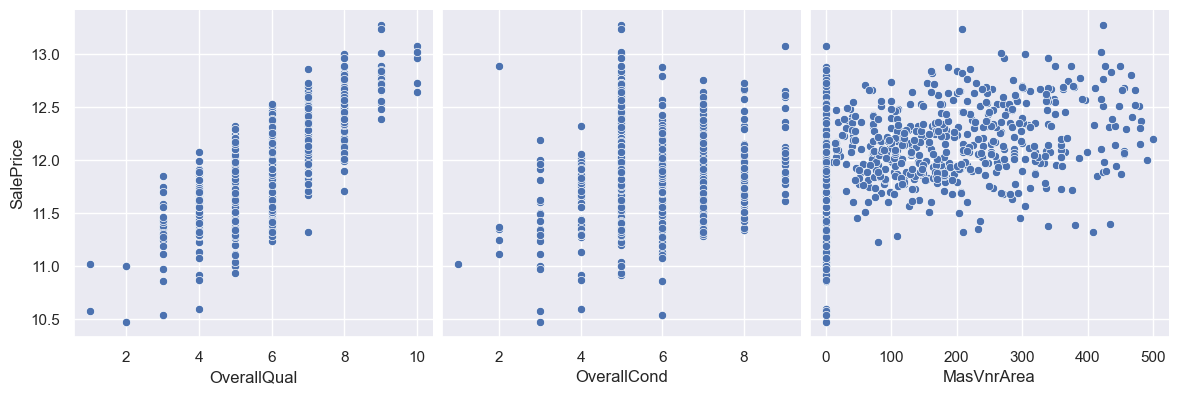

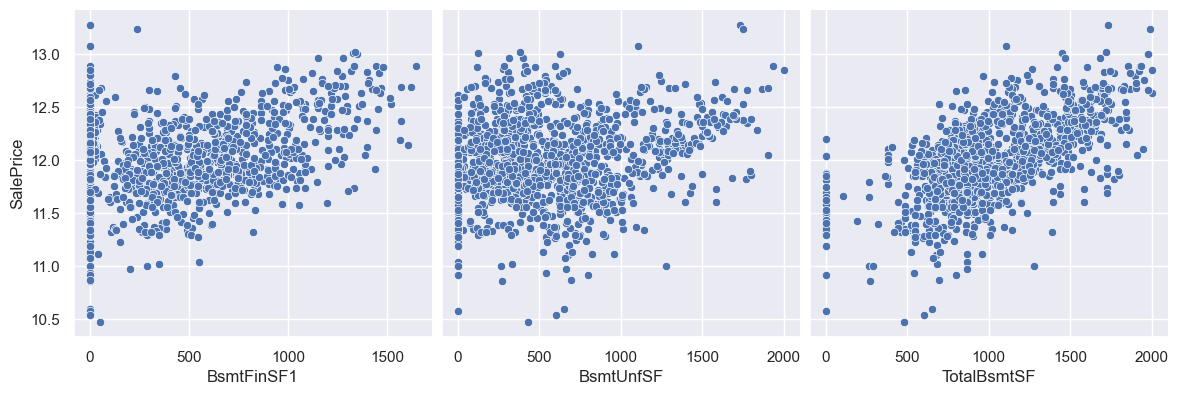

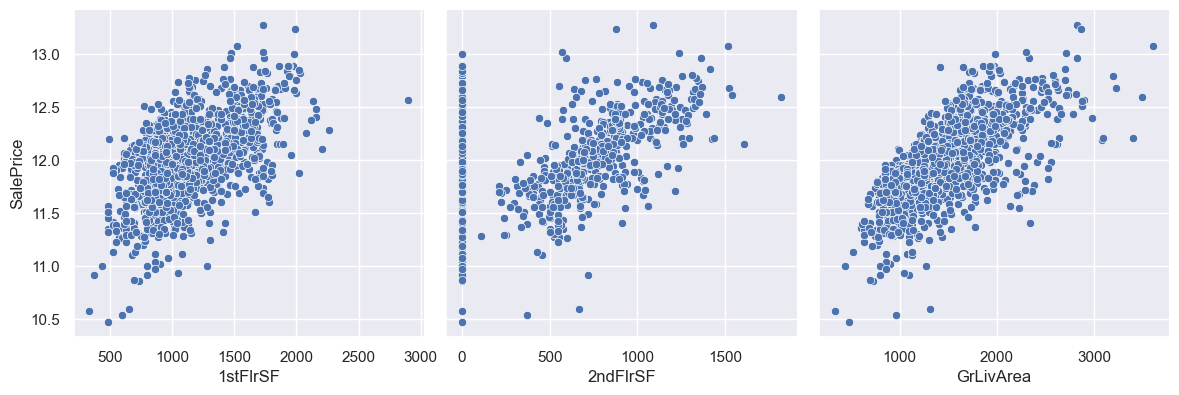

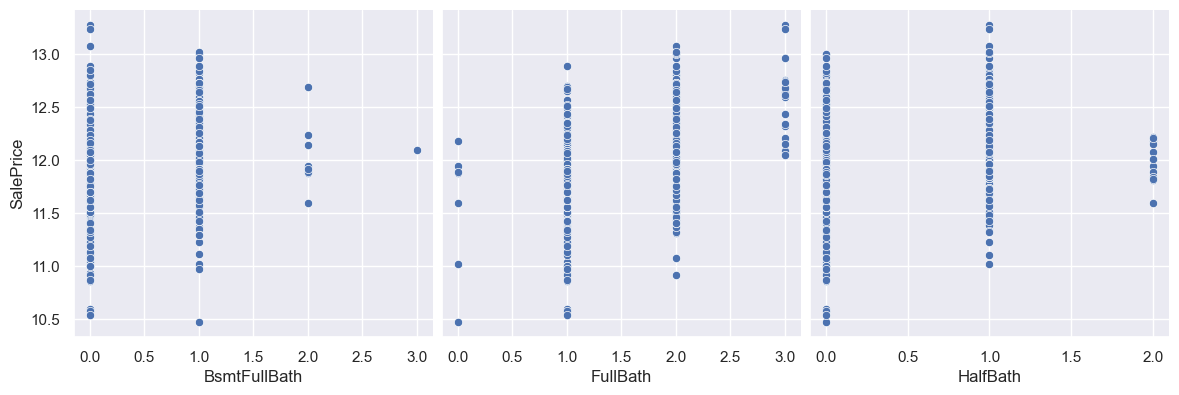

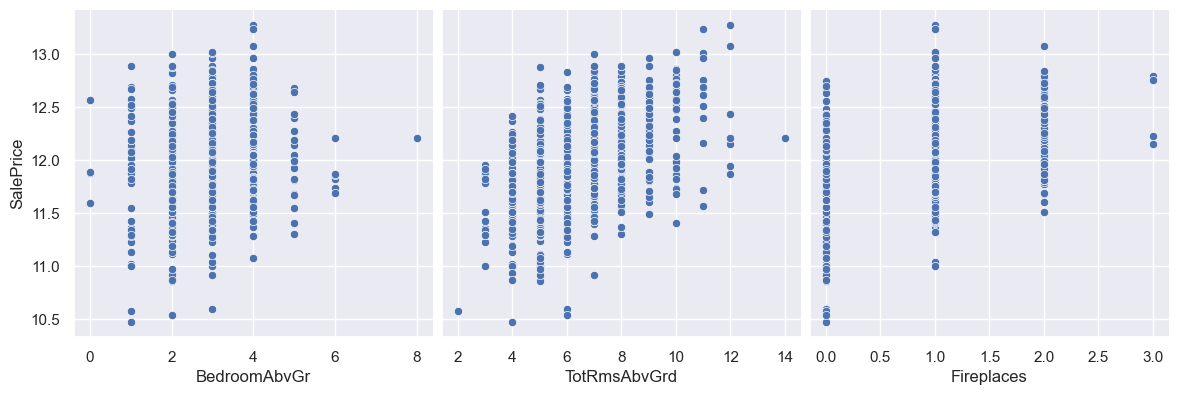

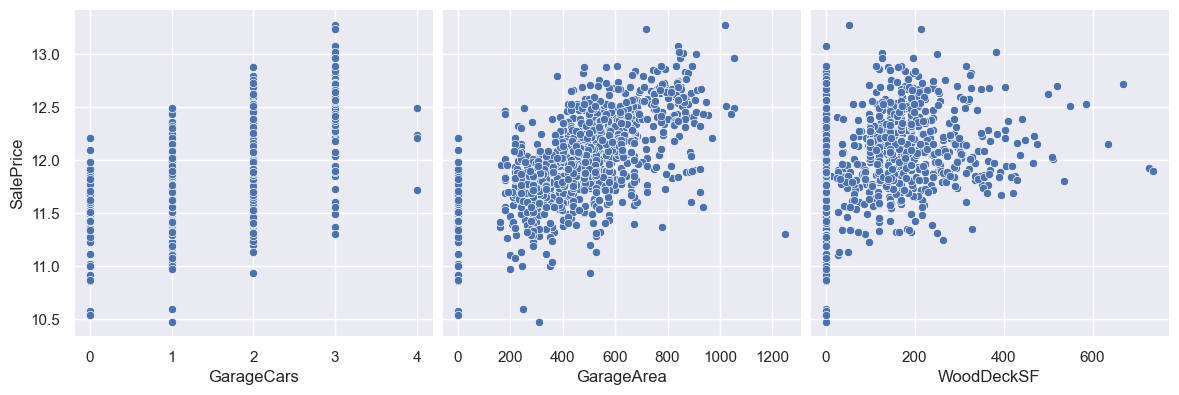

In [45]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

1stFlrSF, GrLivArea seems to be showing correlation towards right - Rest of the variables are too scattered and hence can be understood during further analysis

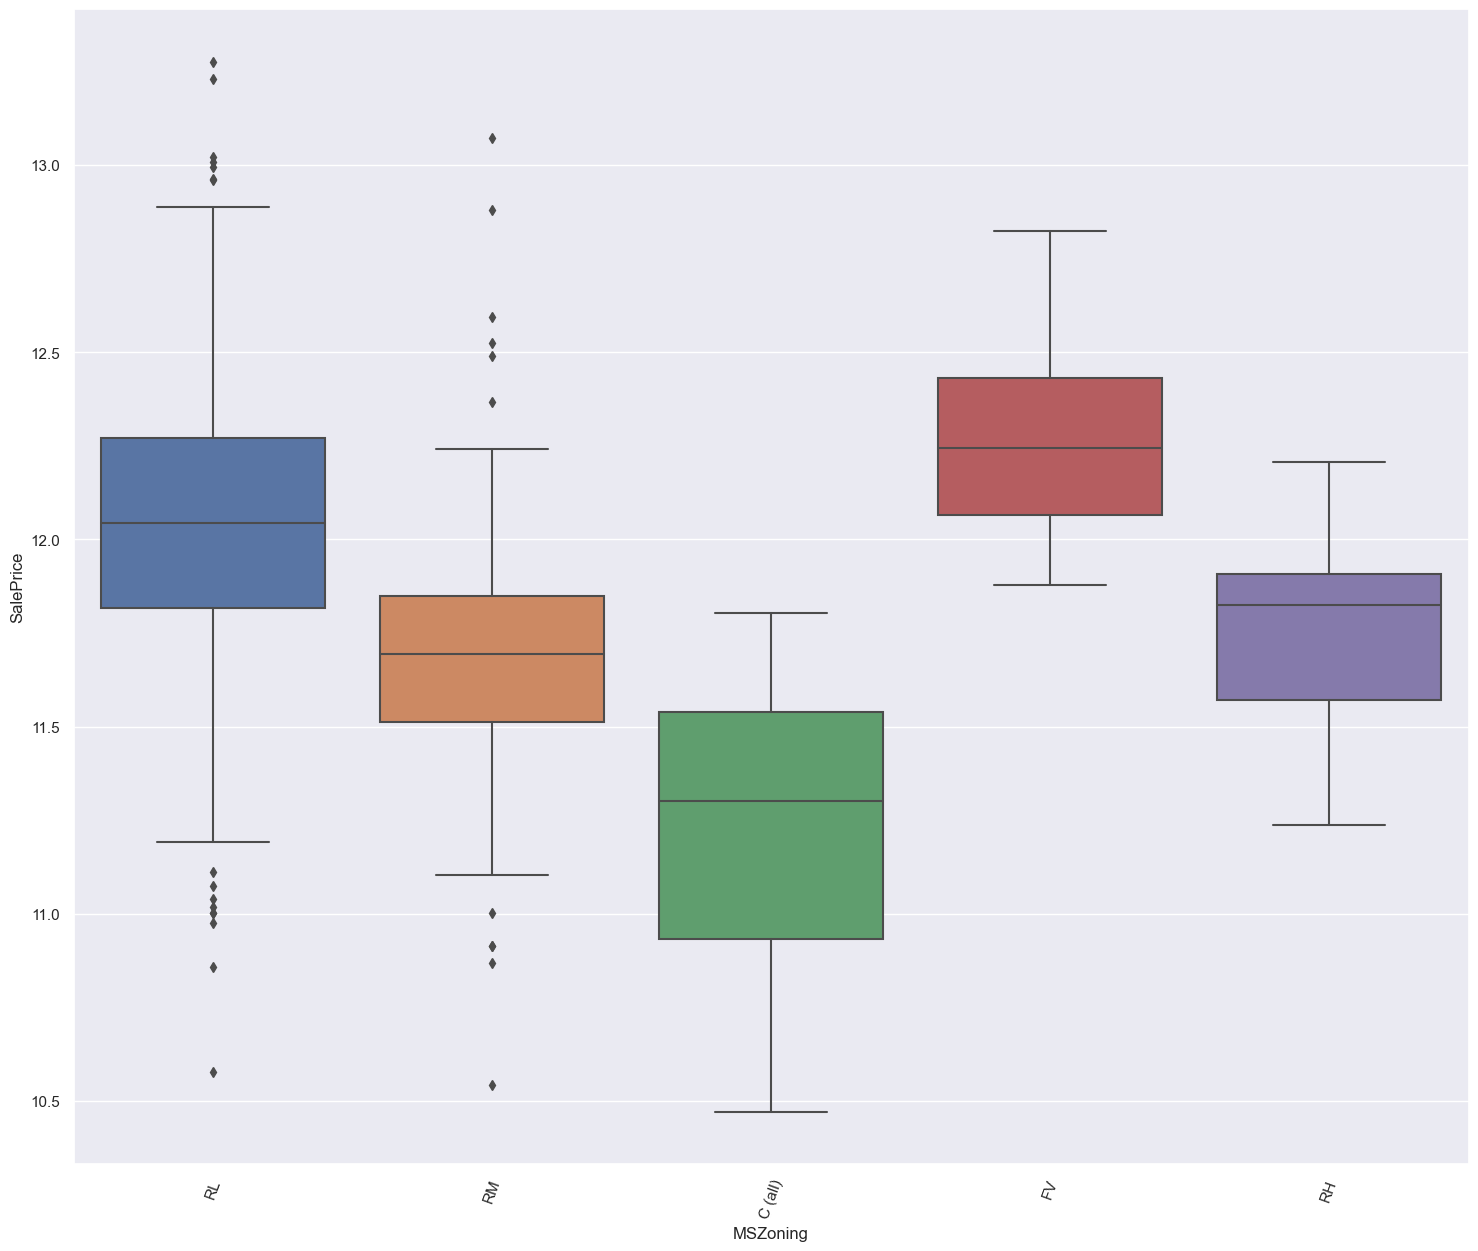

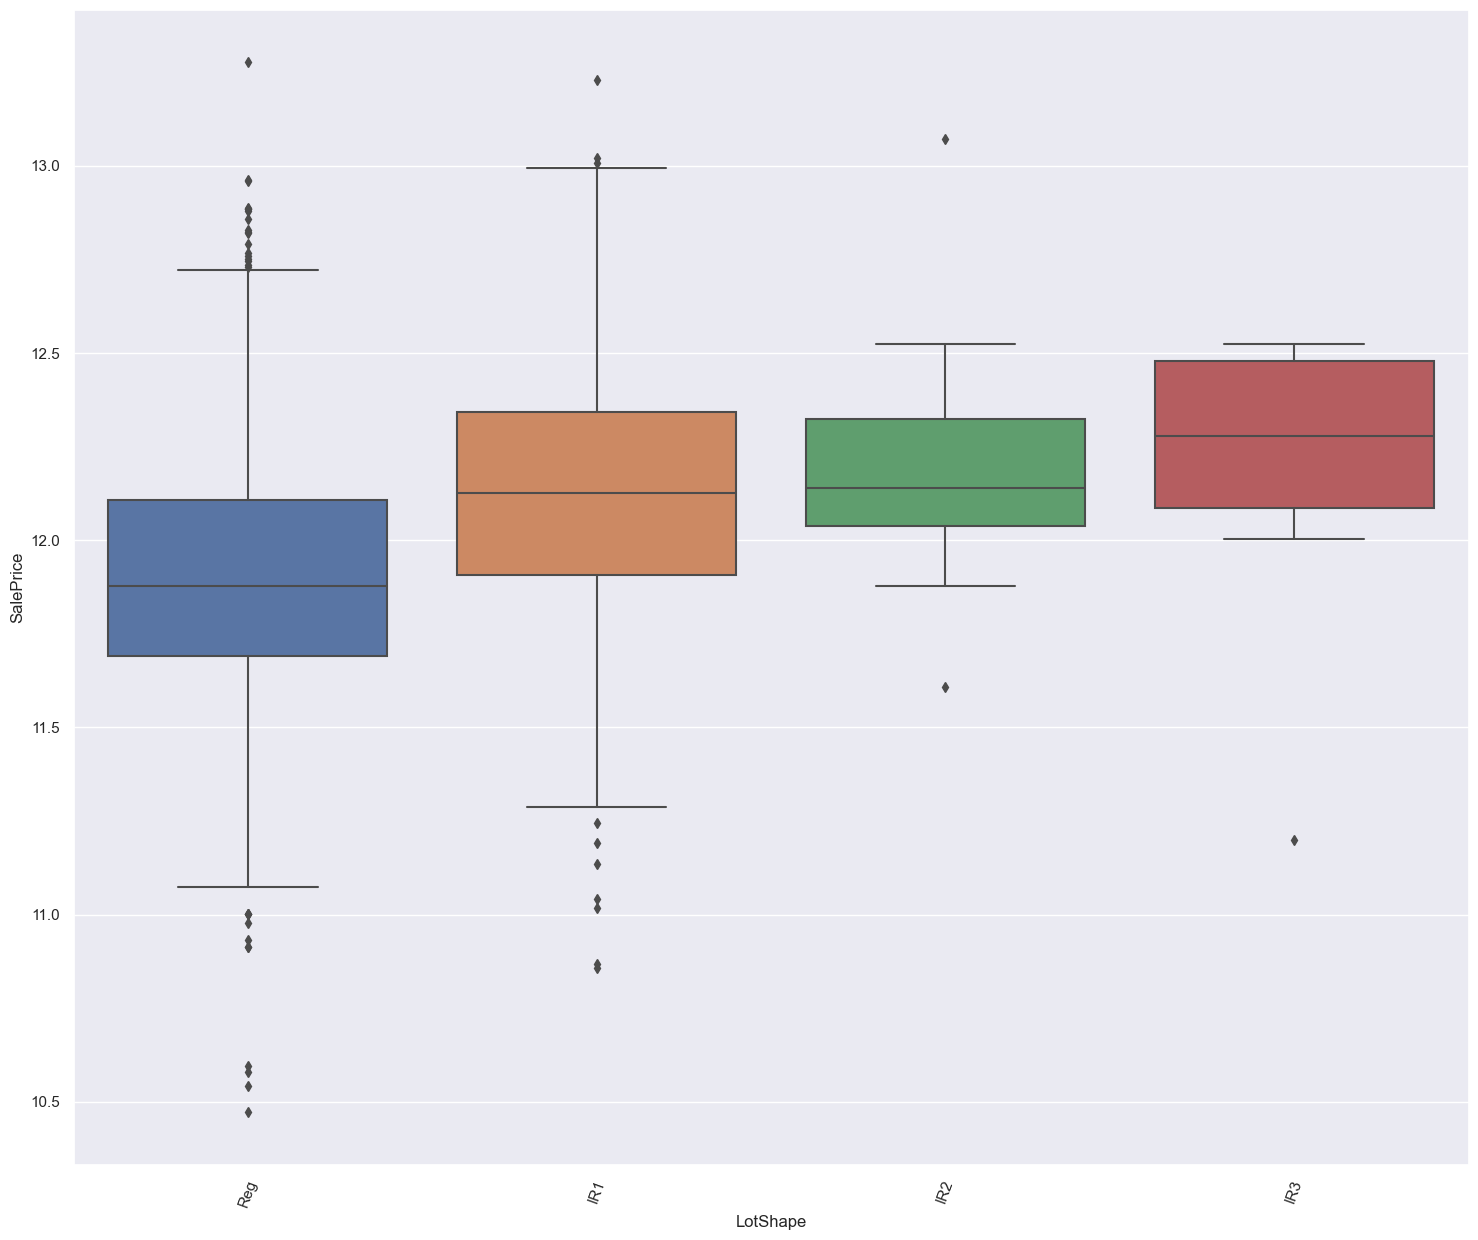

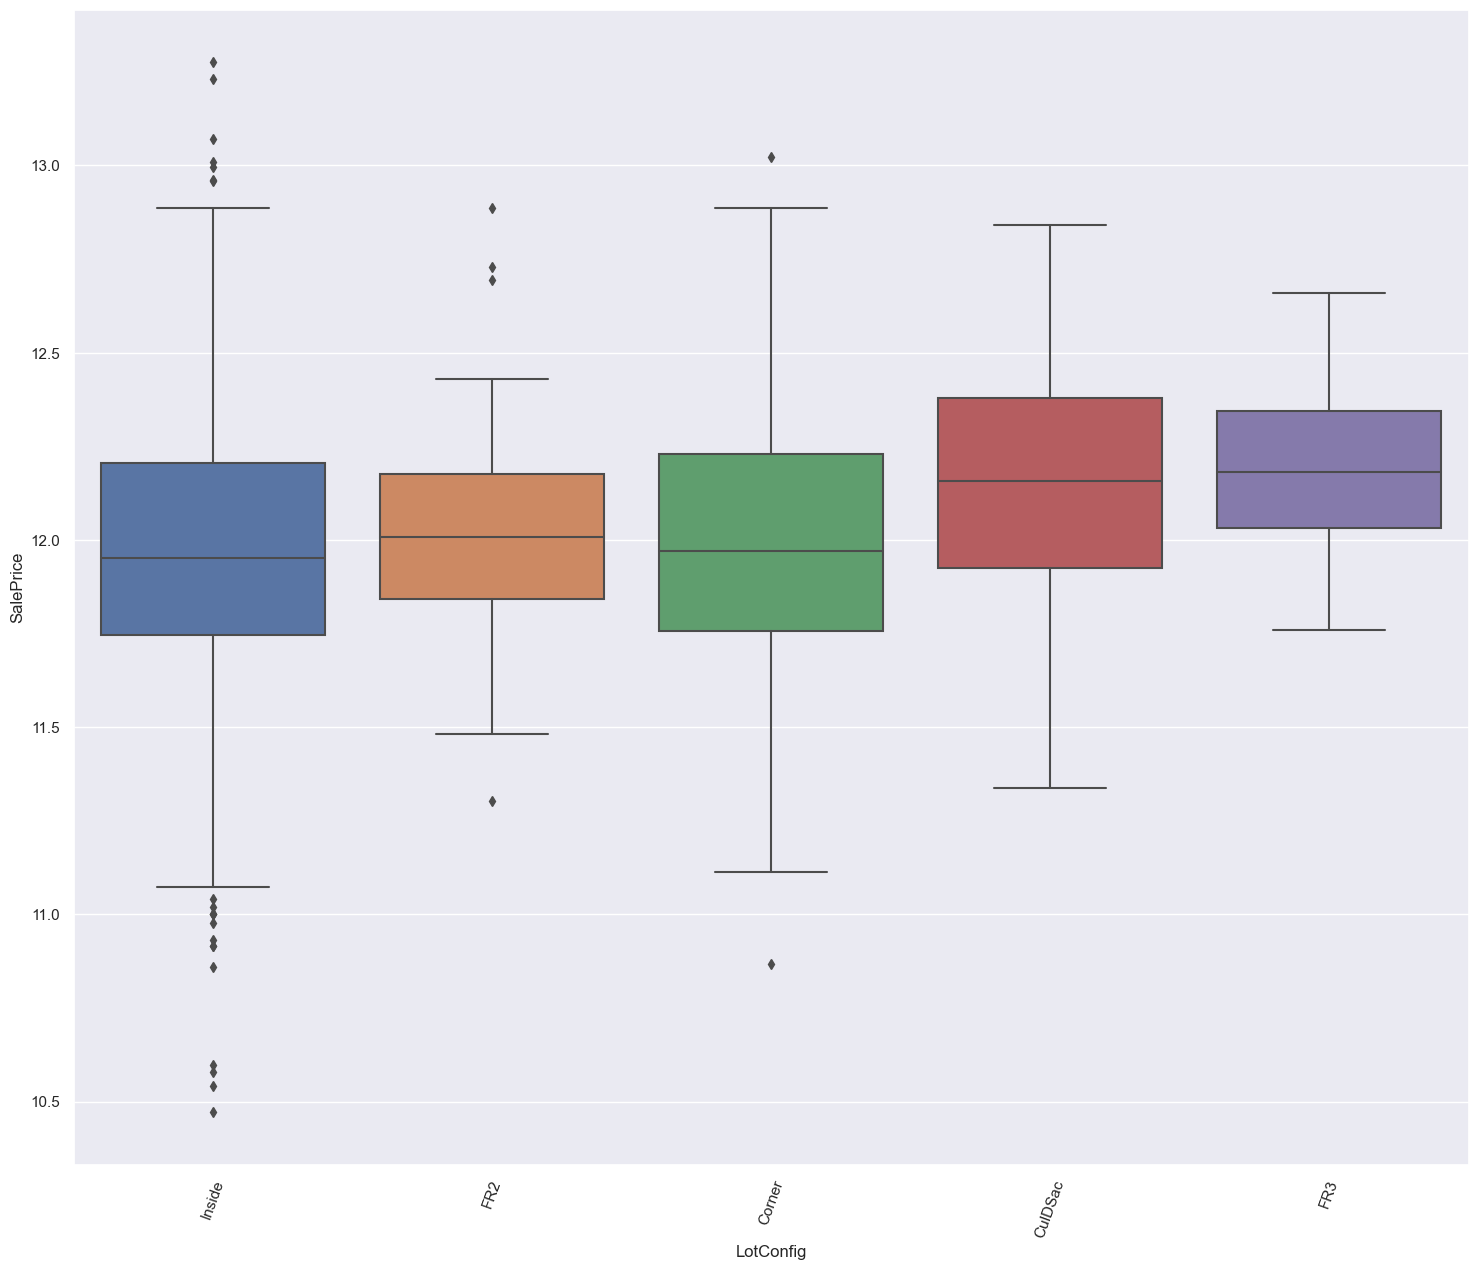

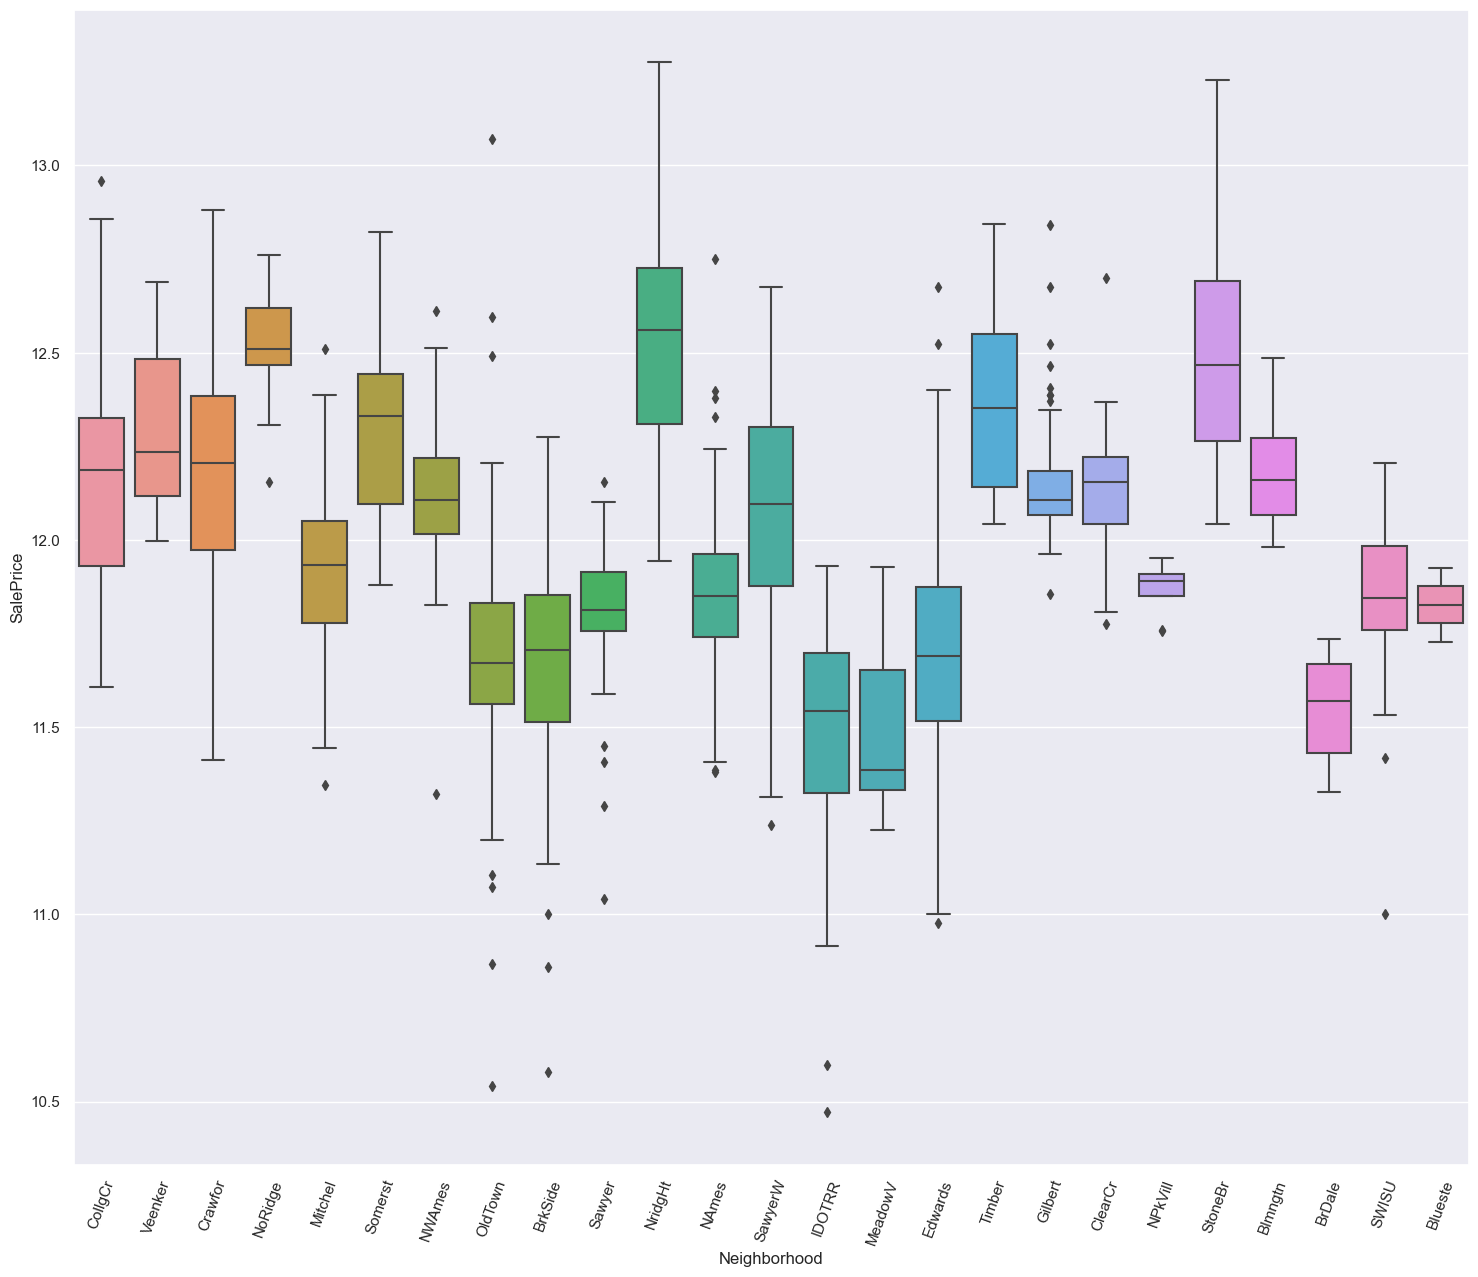

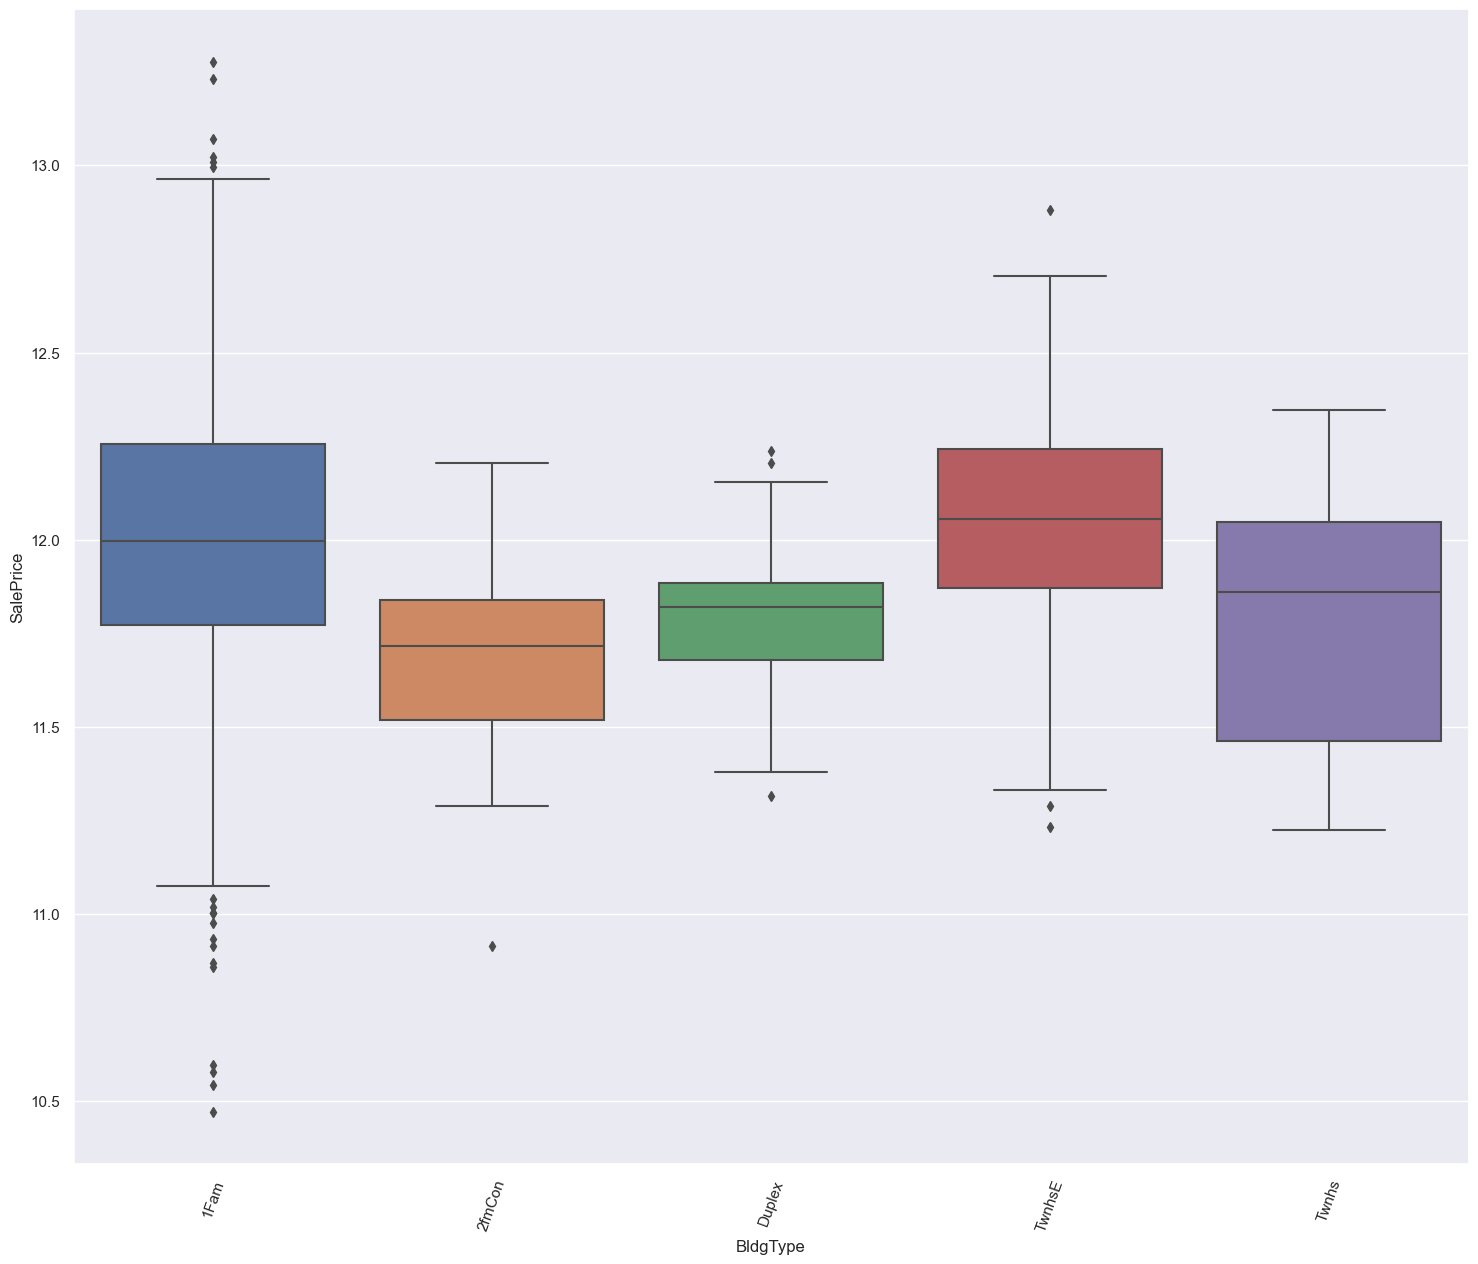

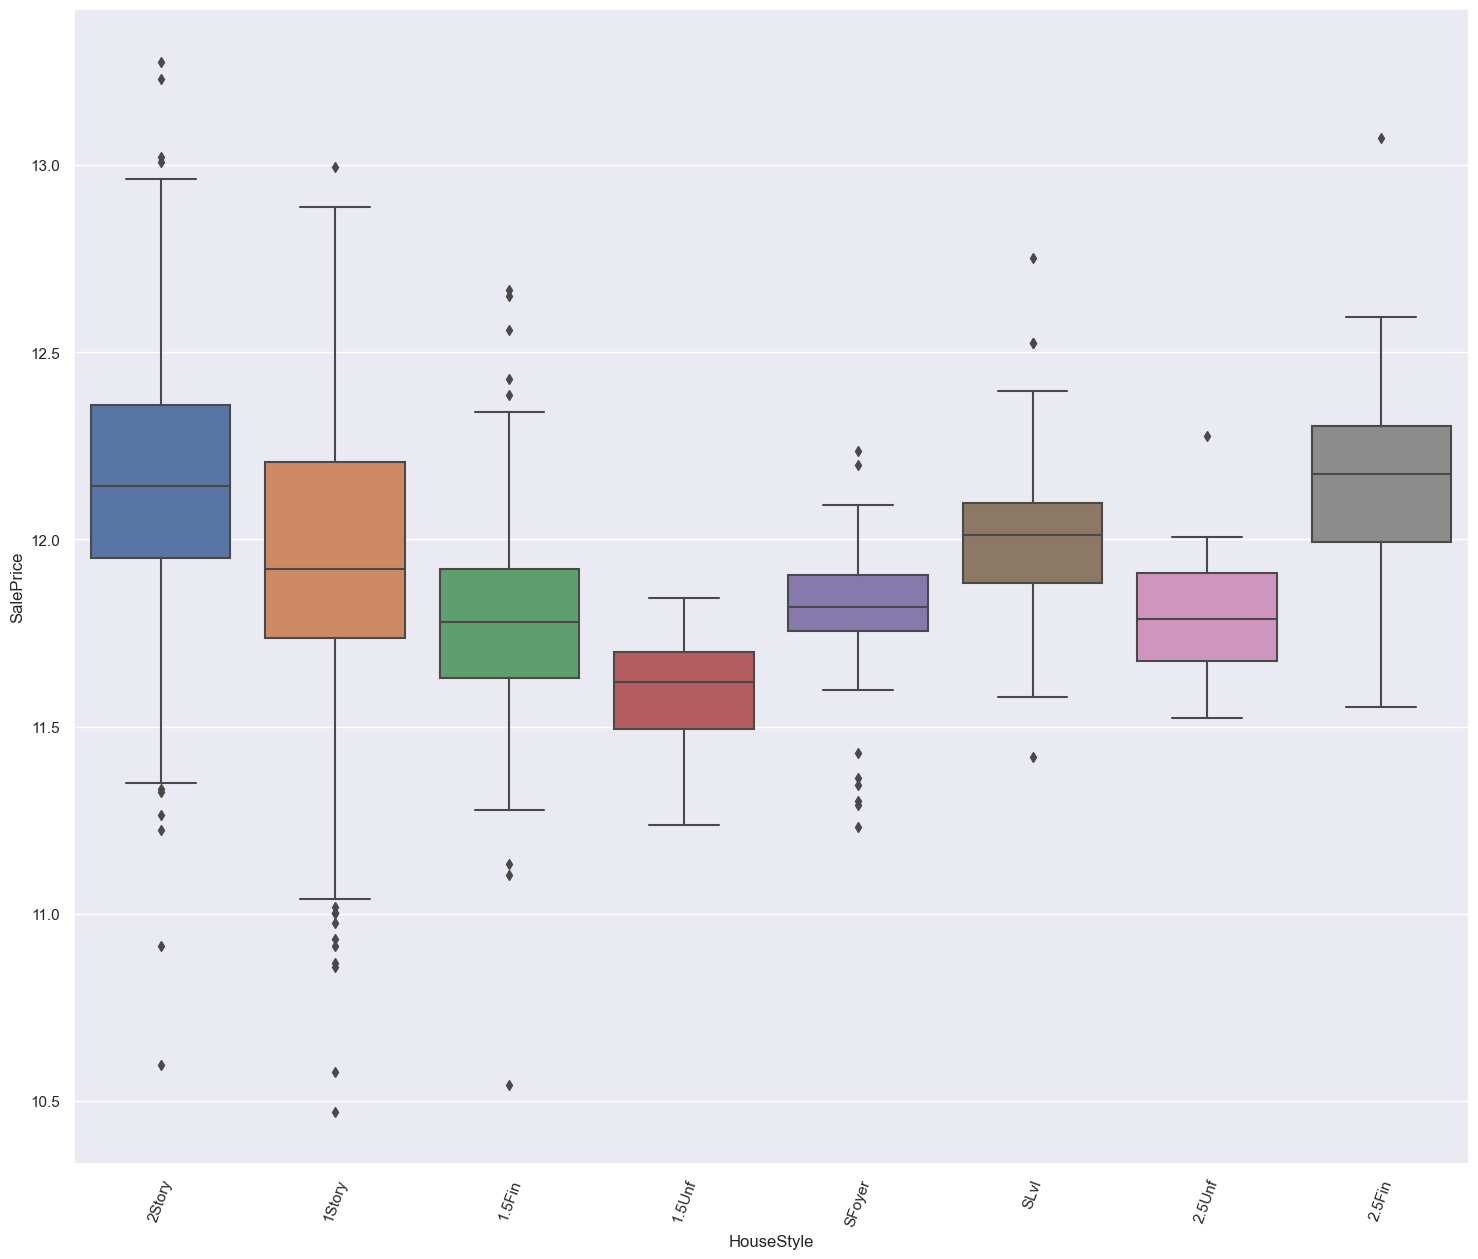

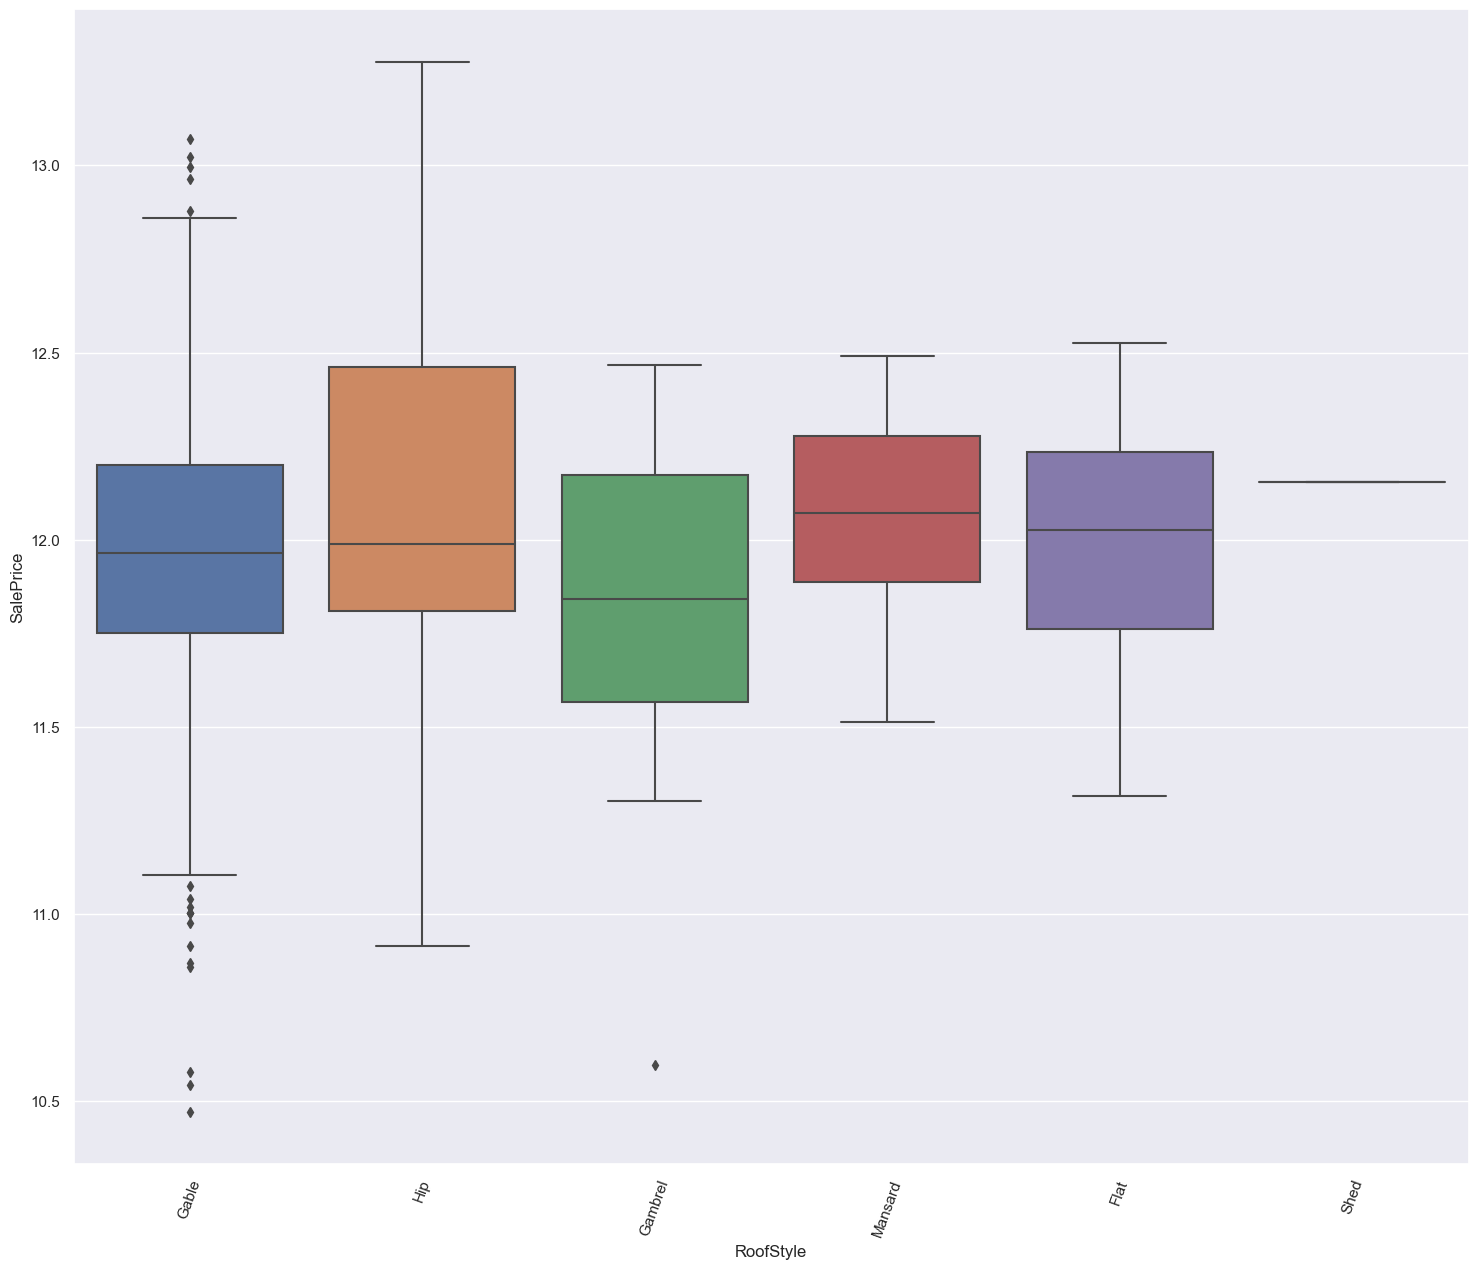

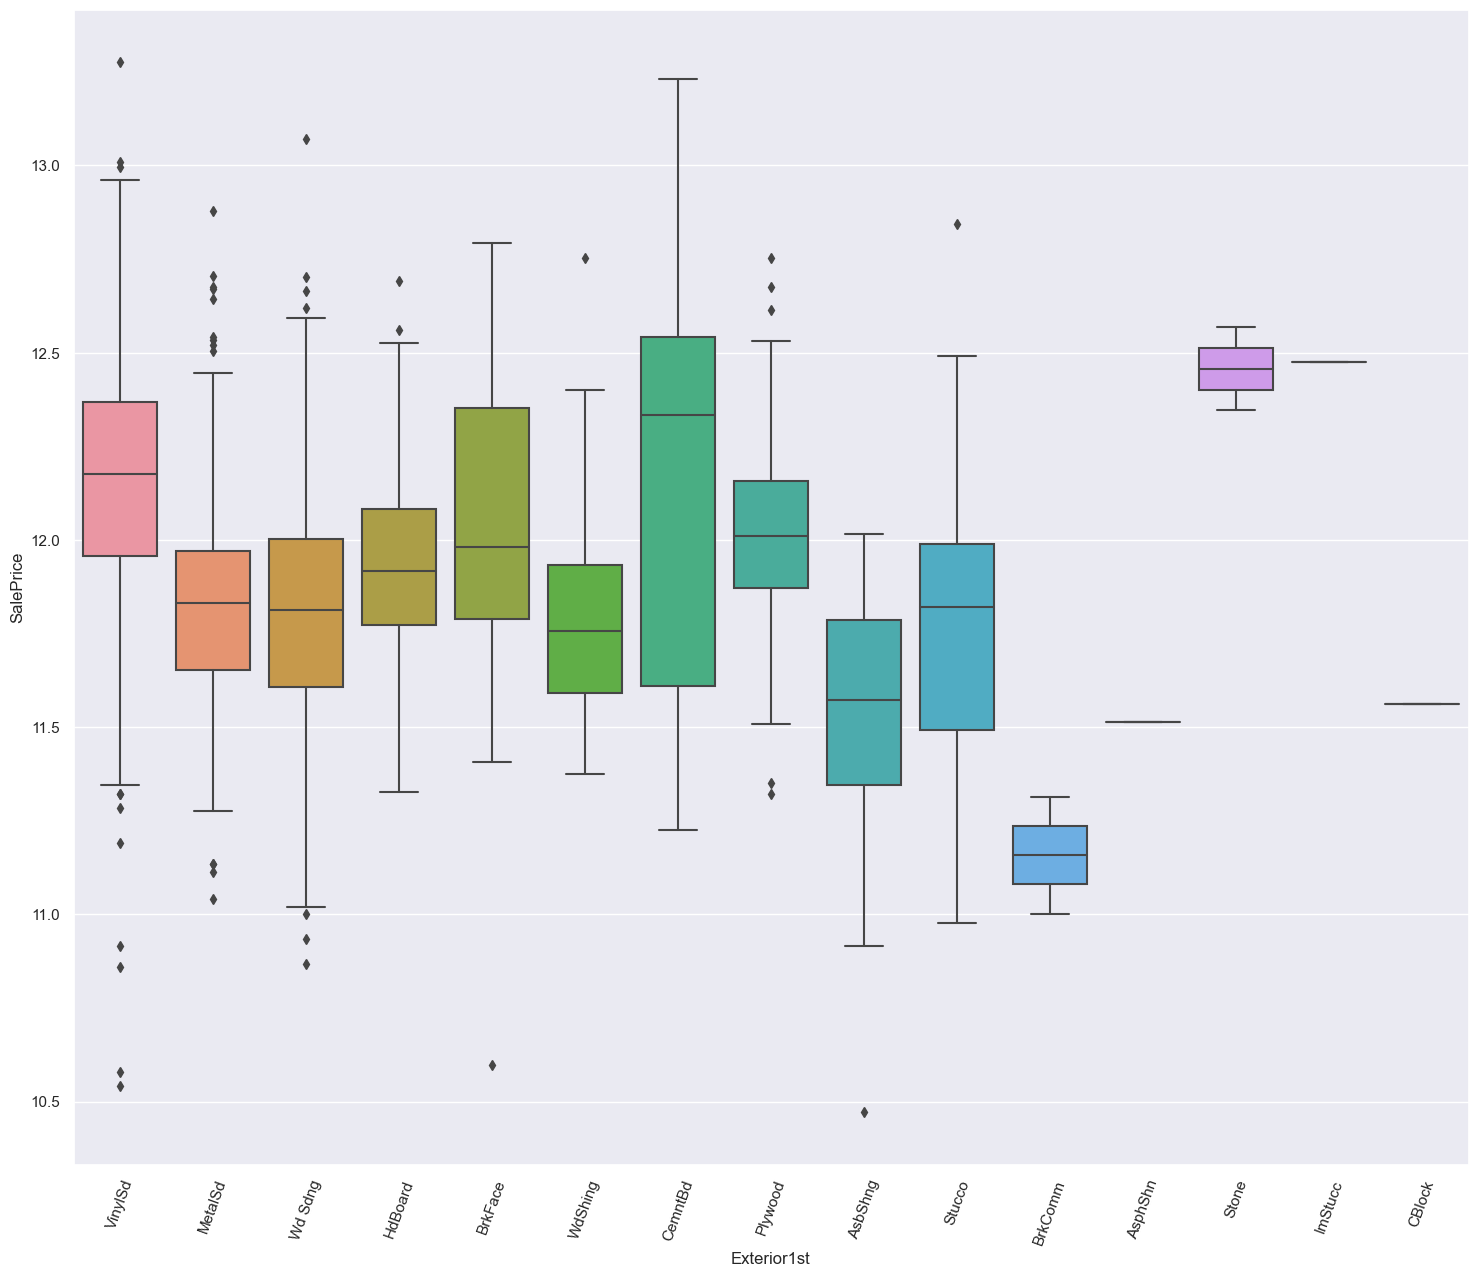

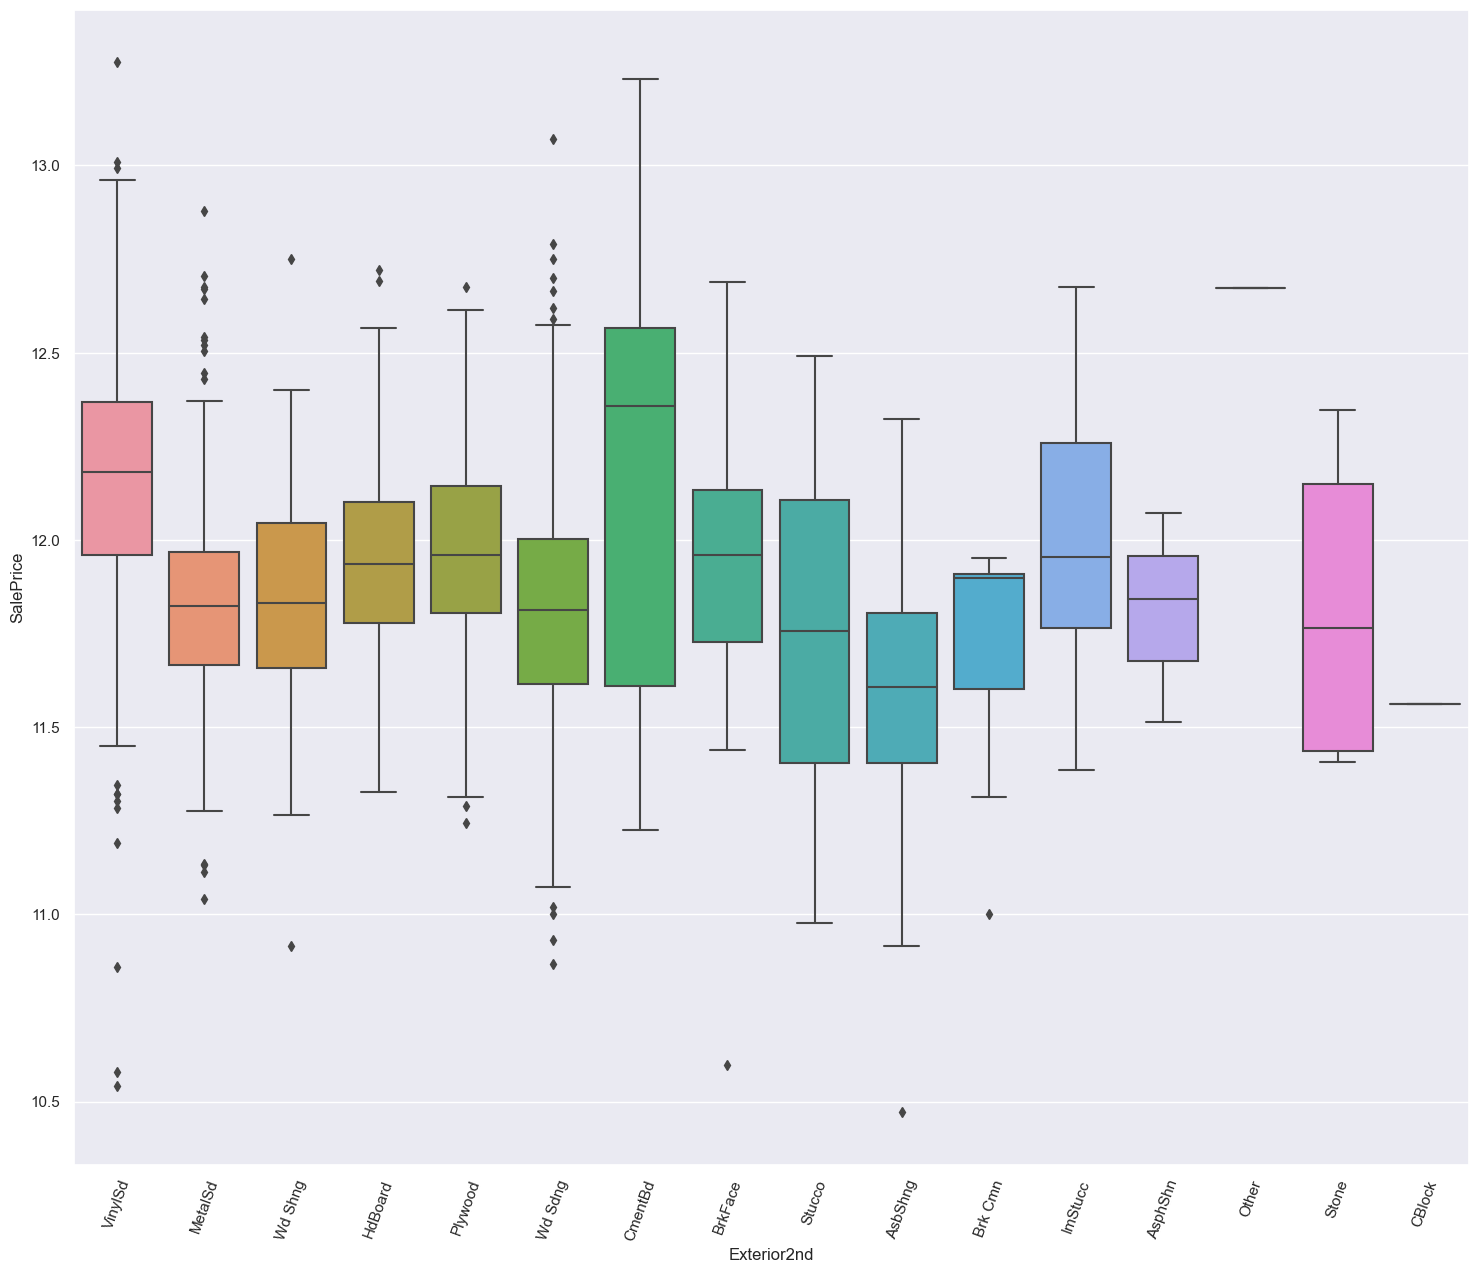

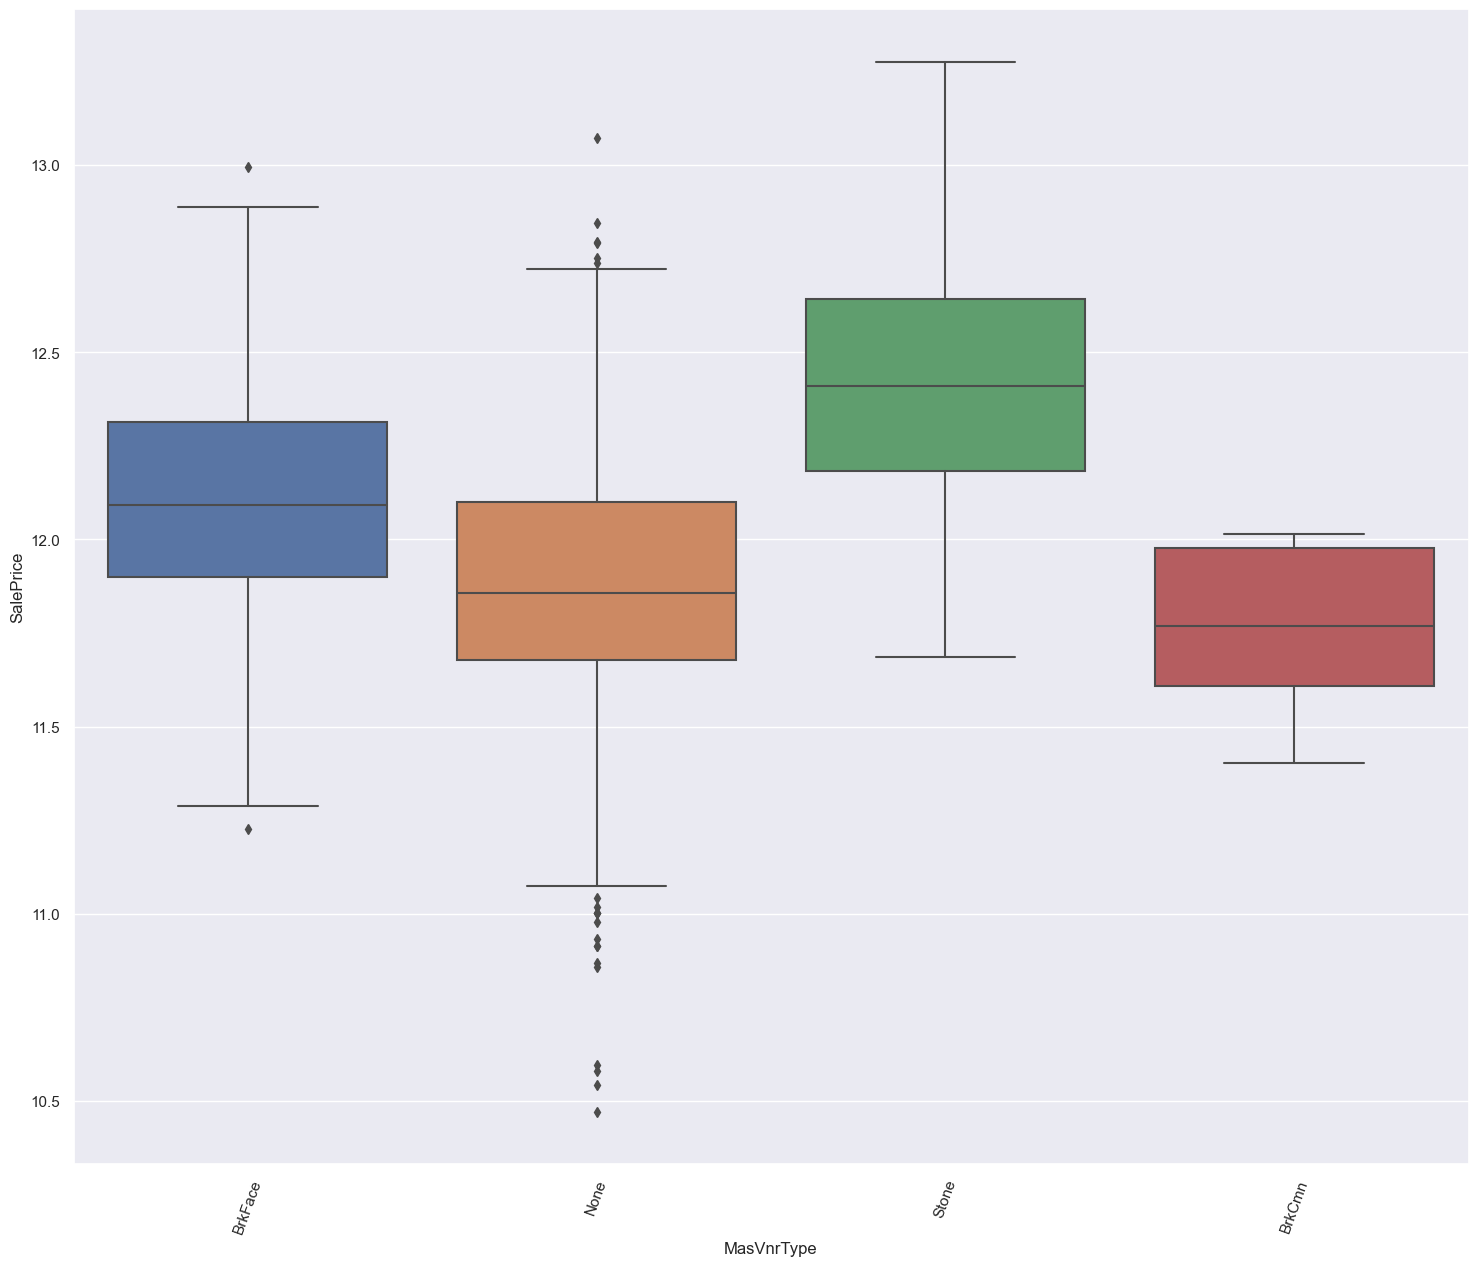

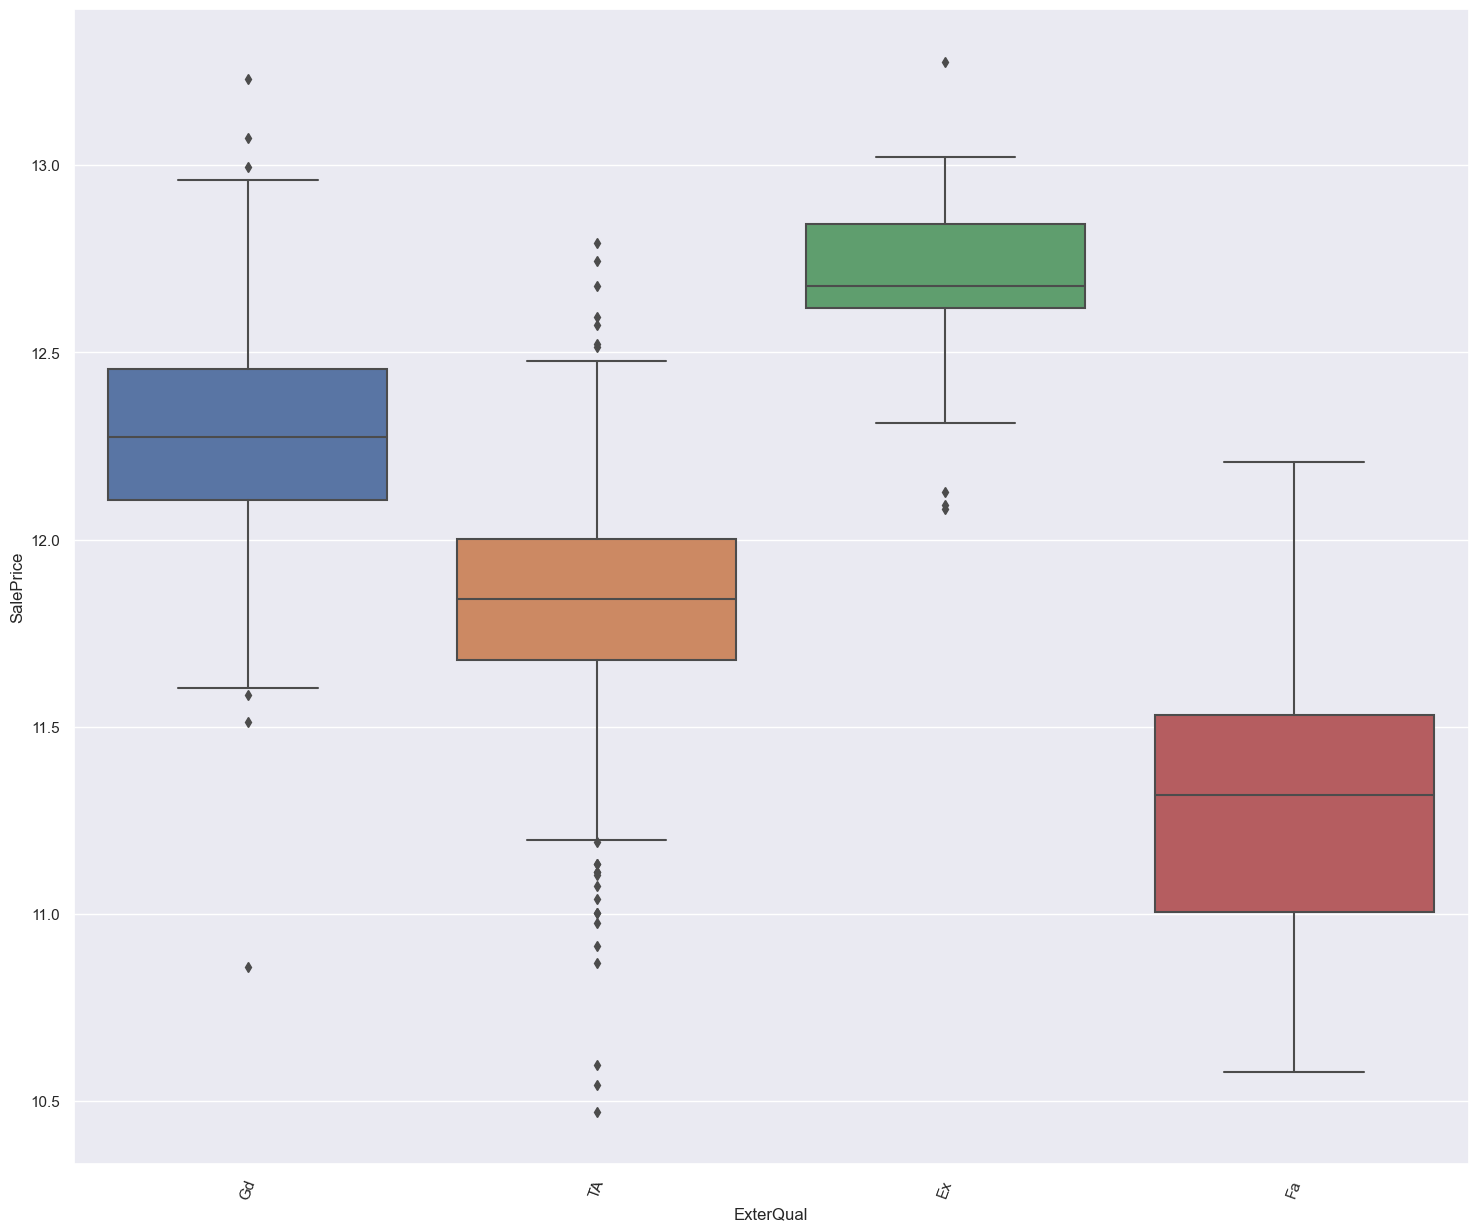

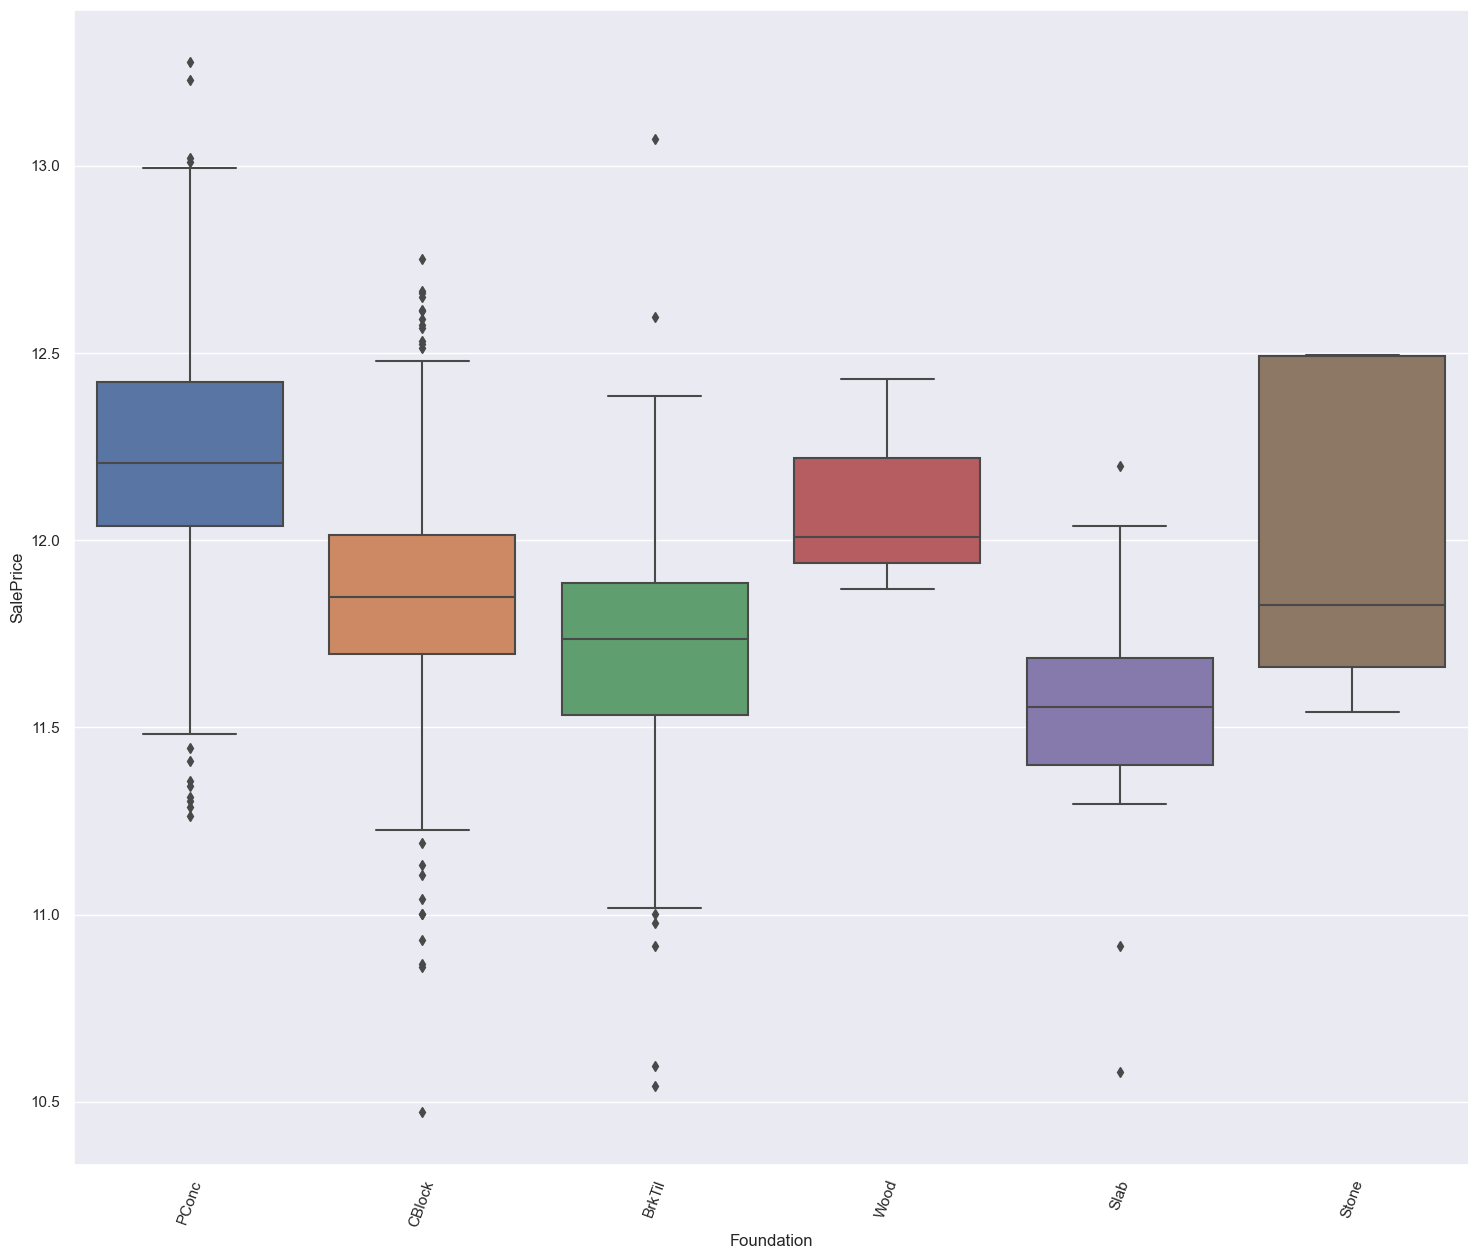

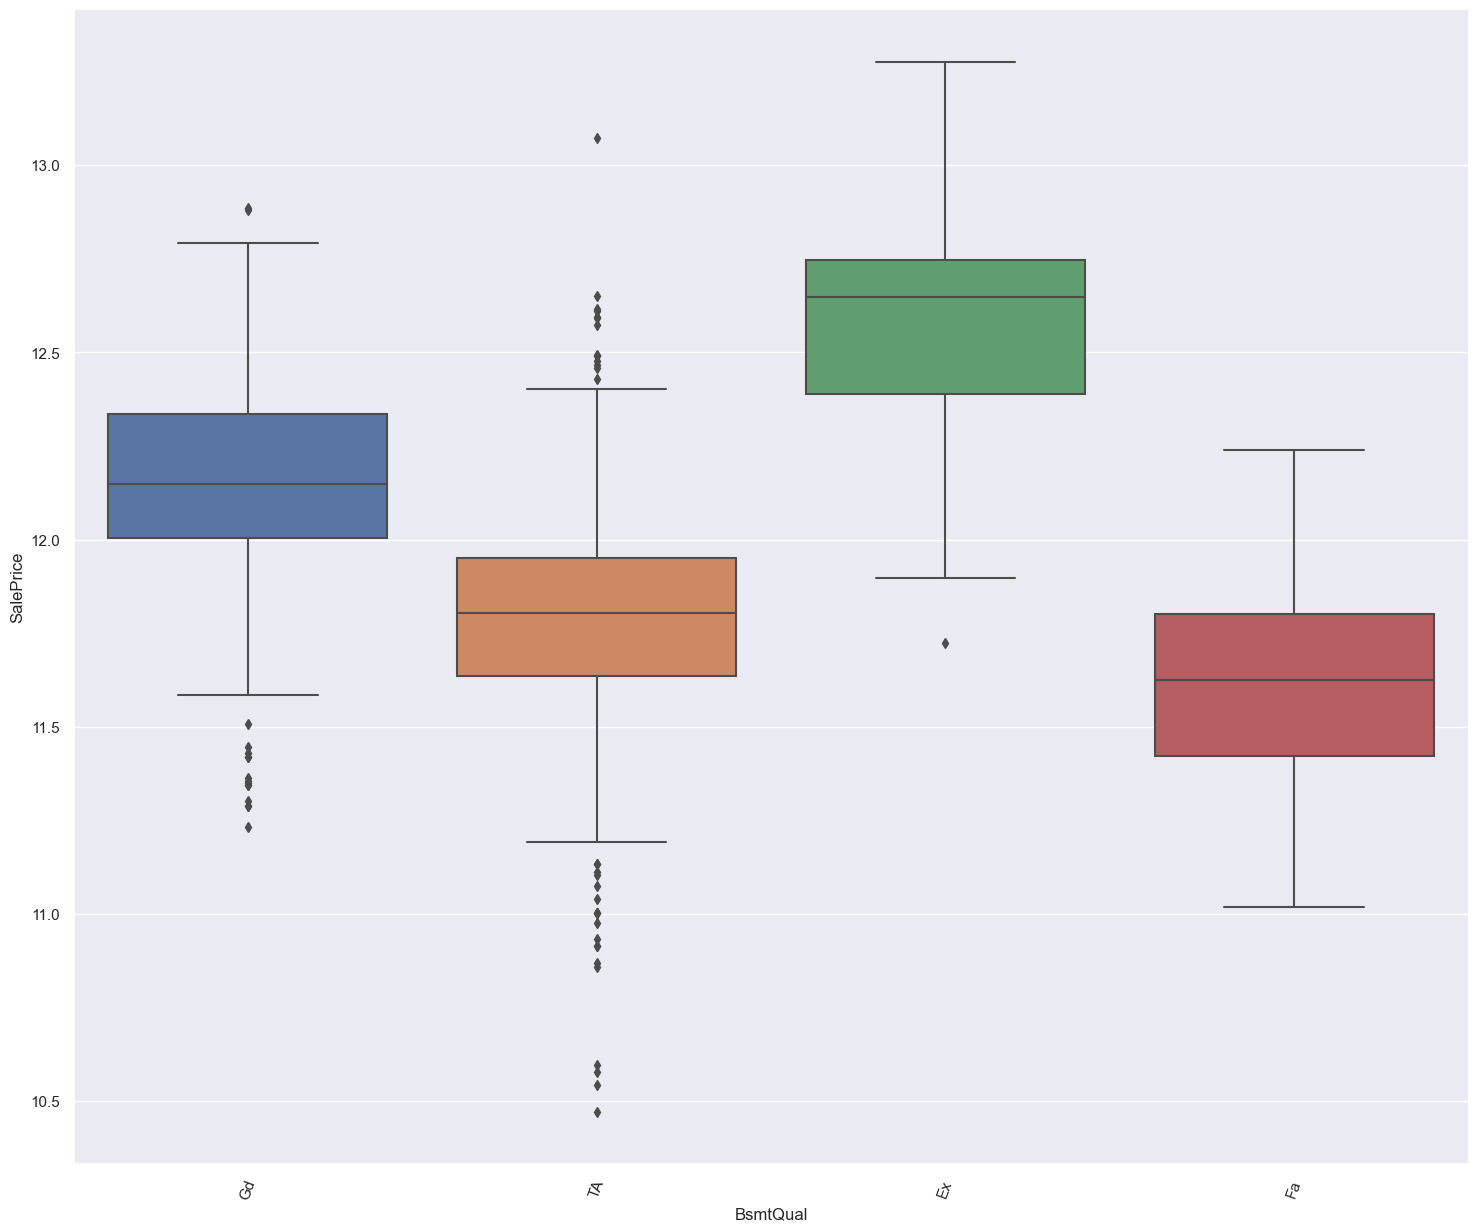

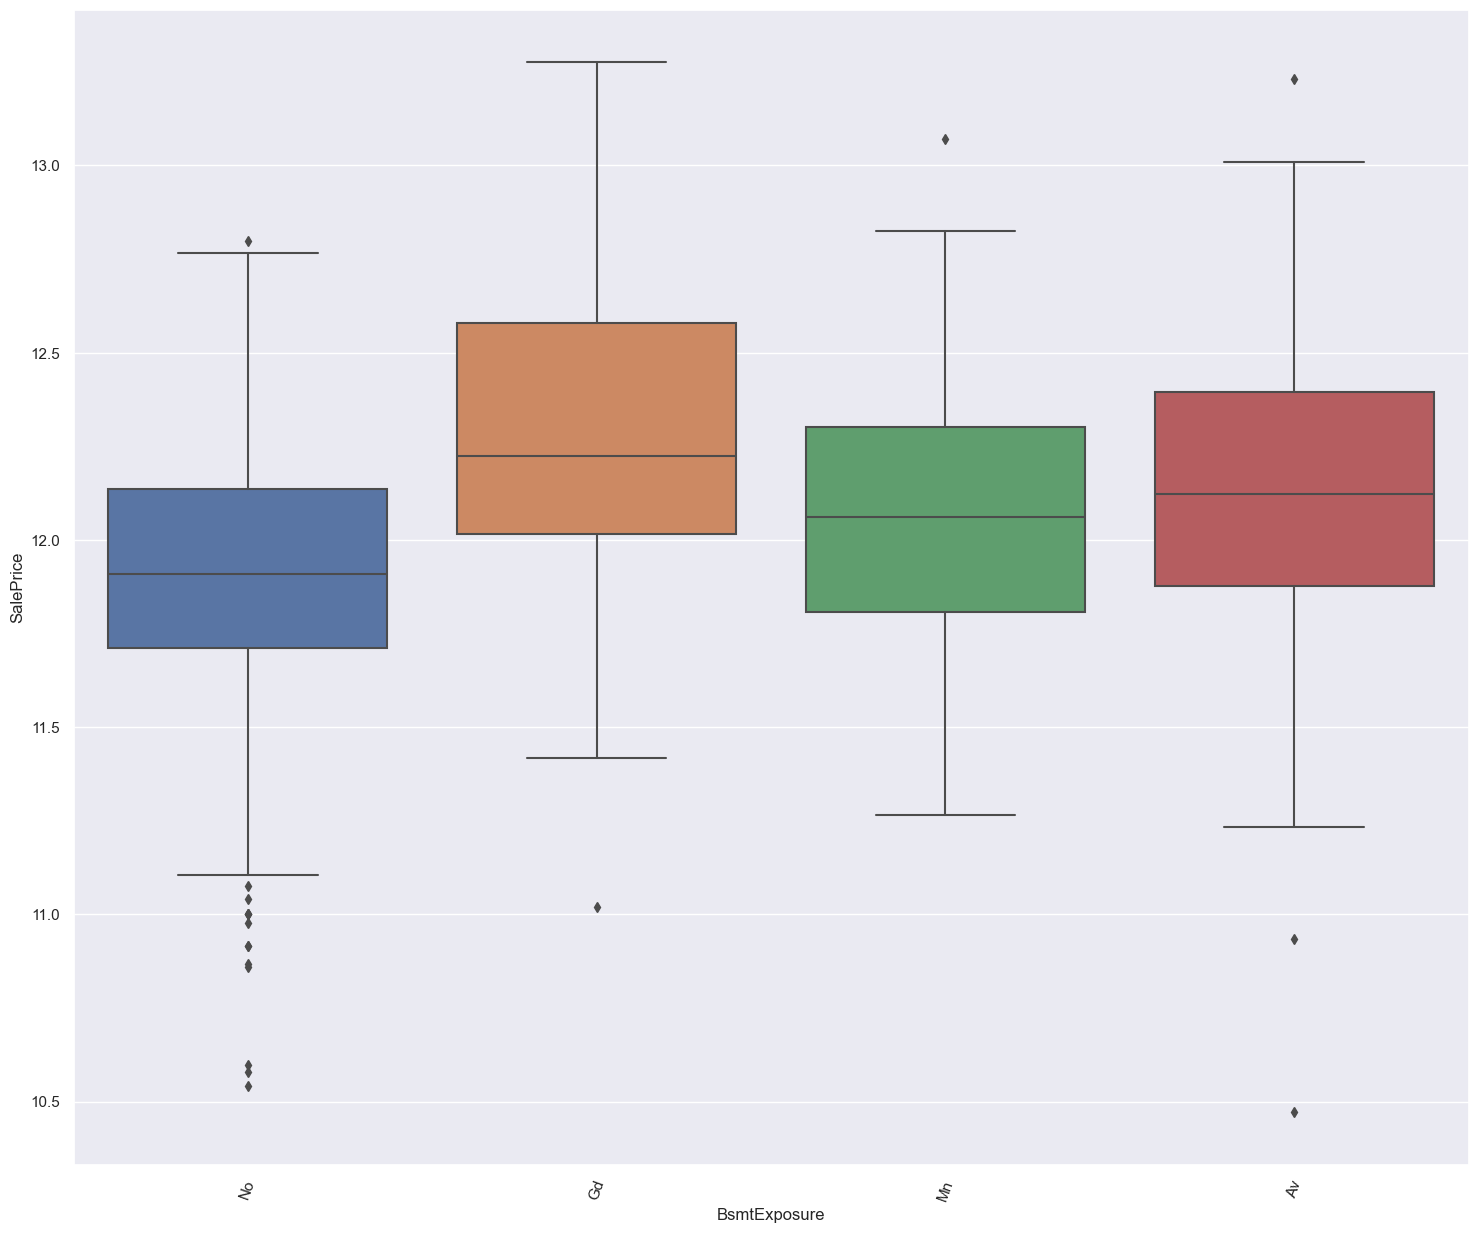

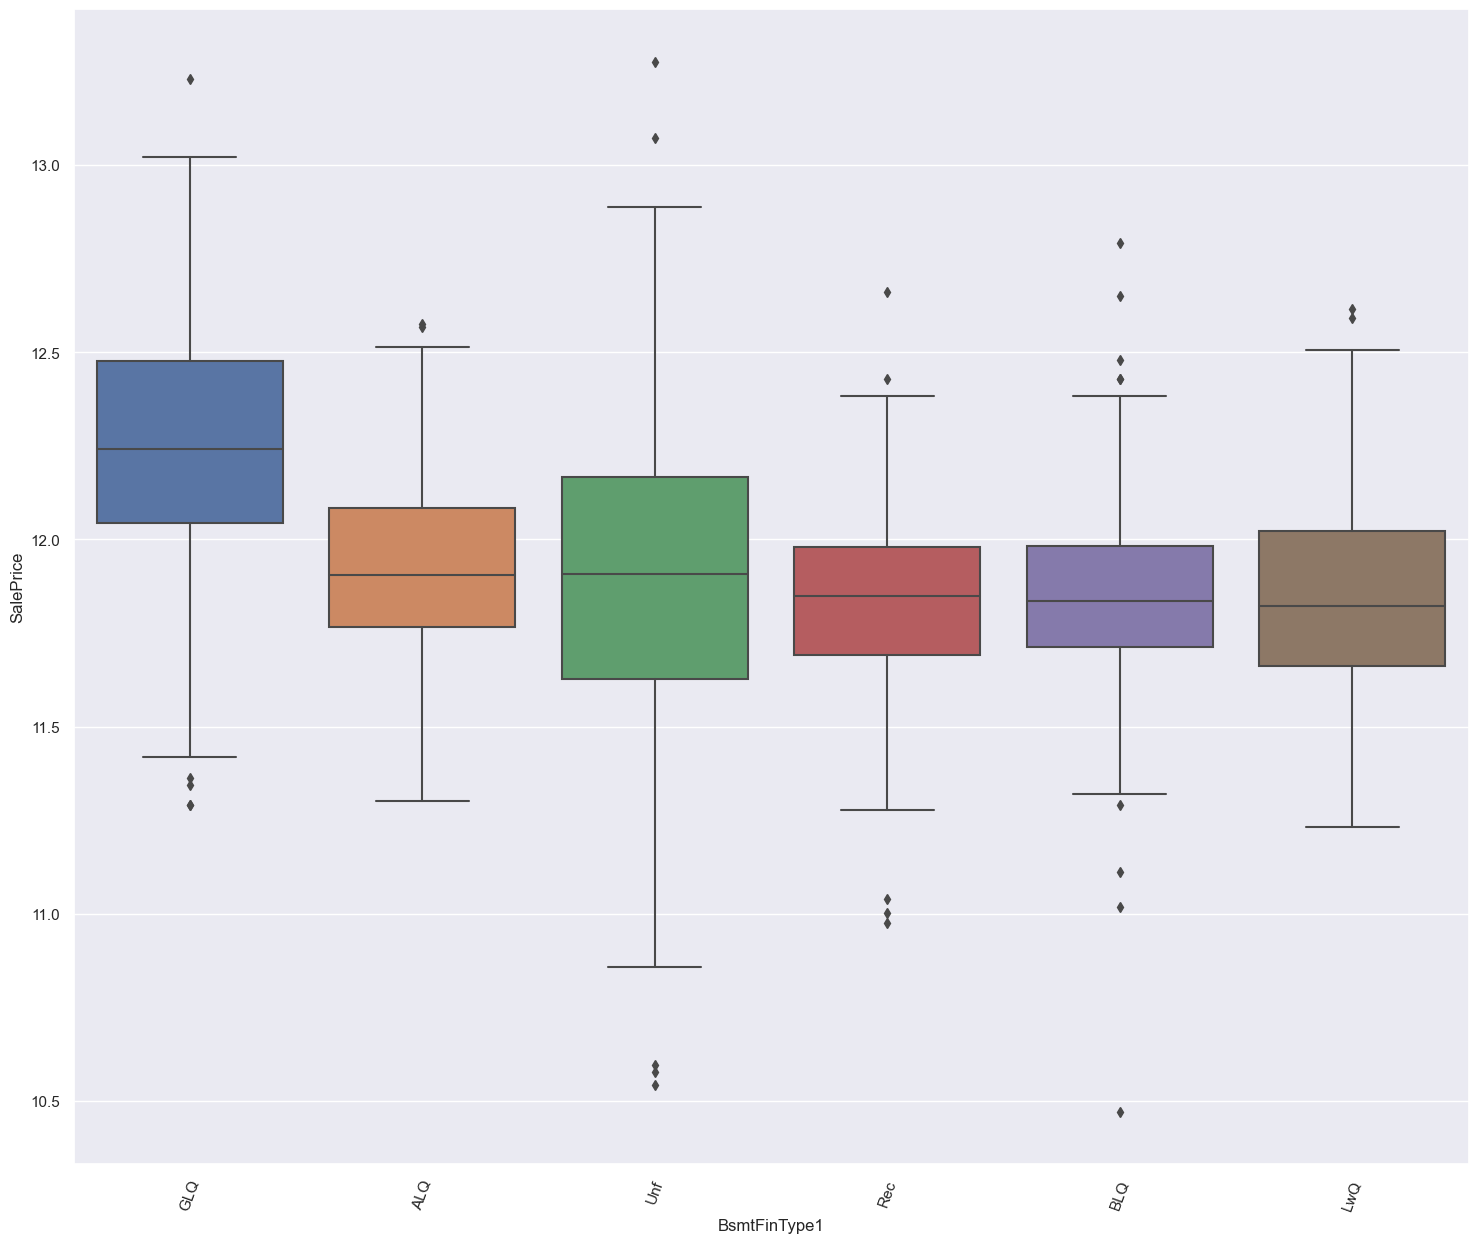

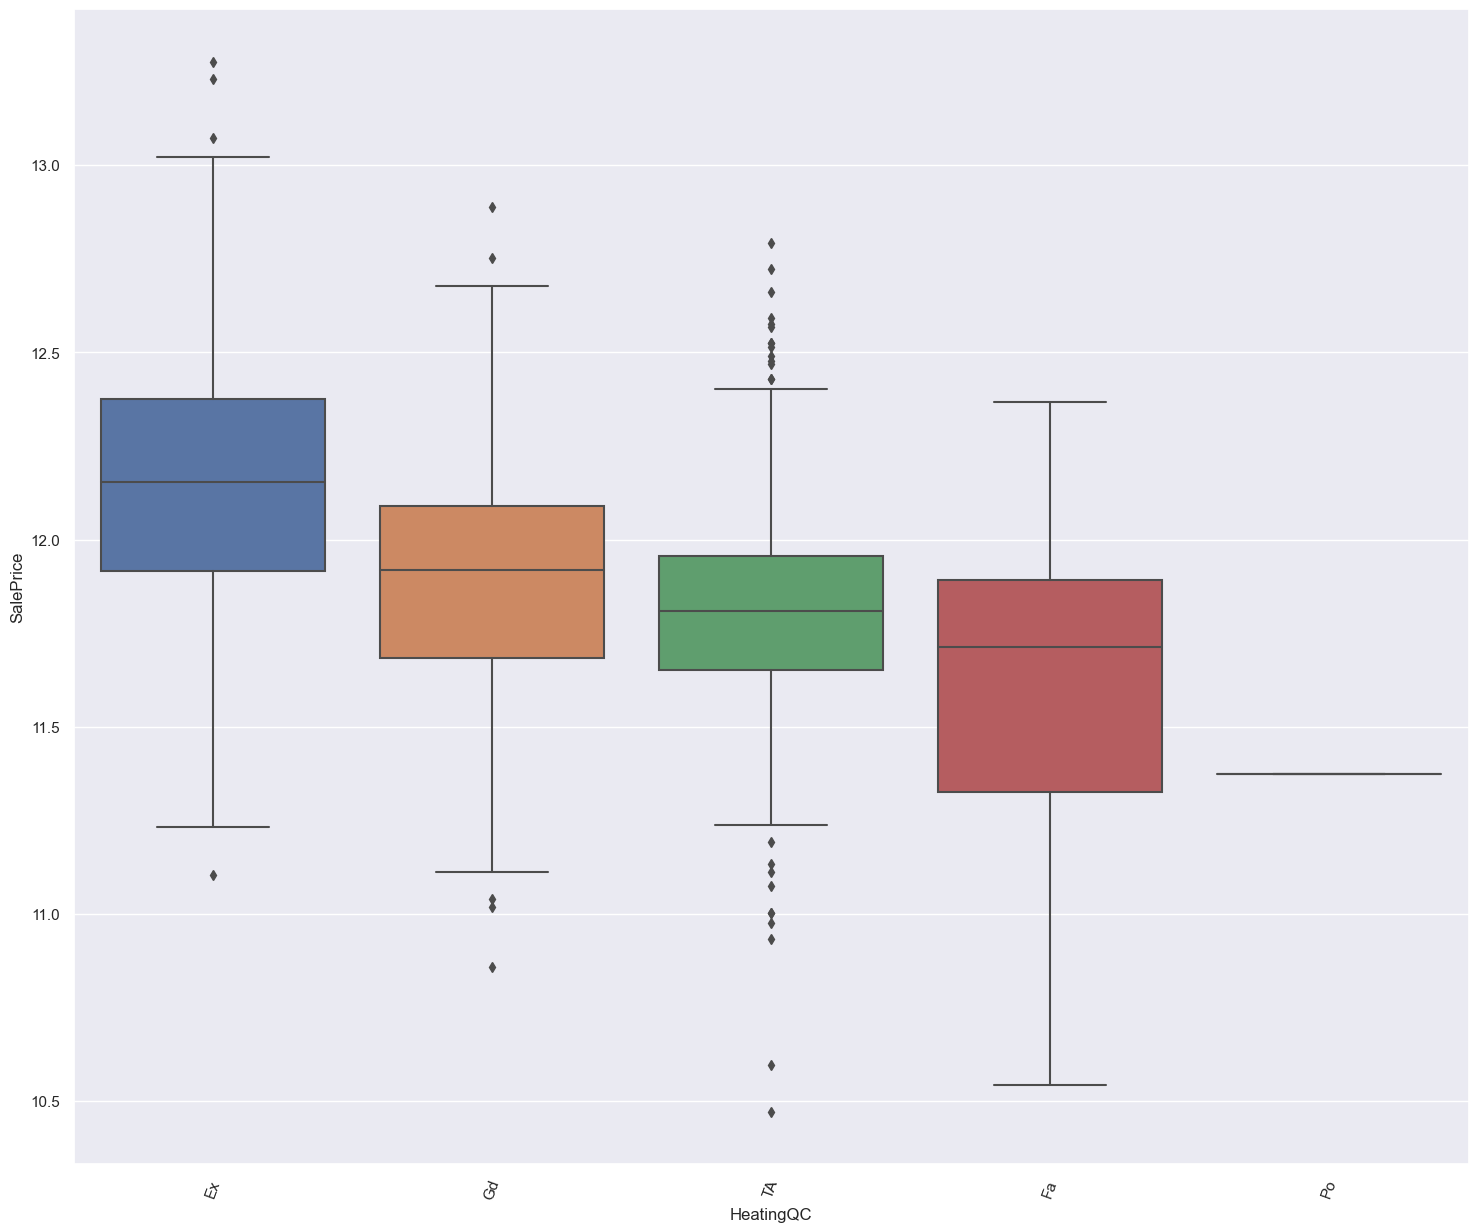

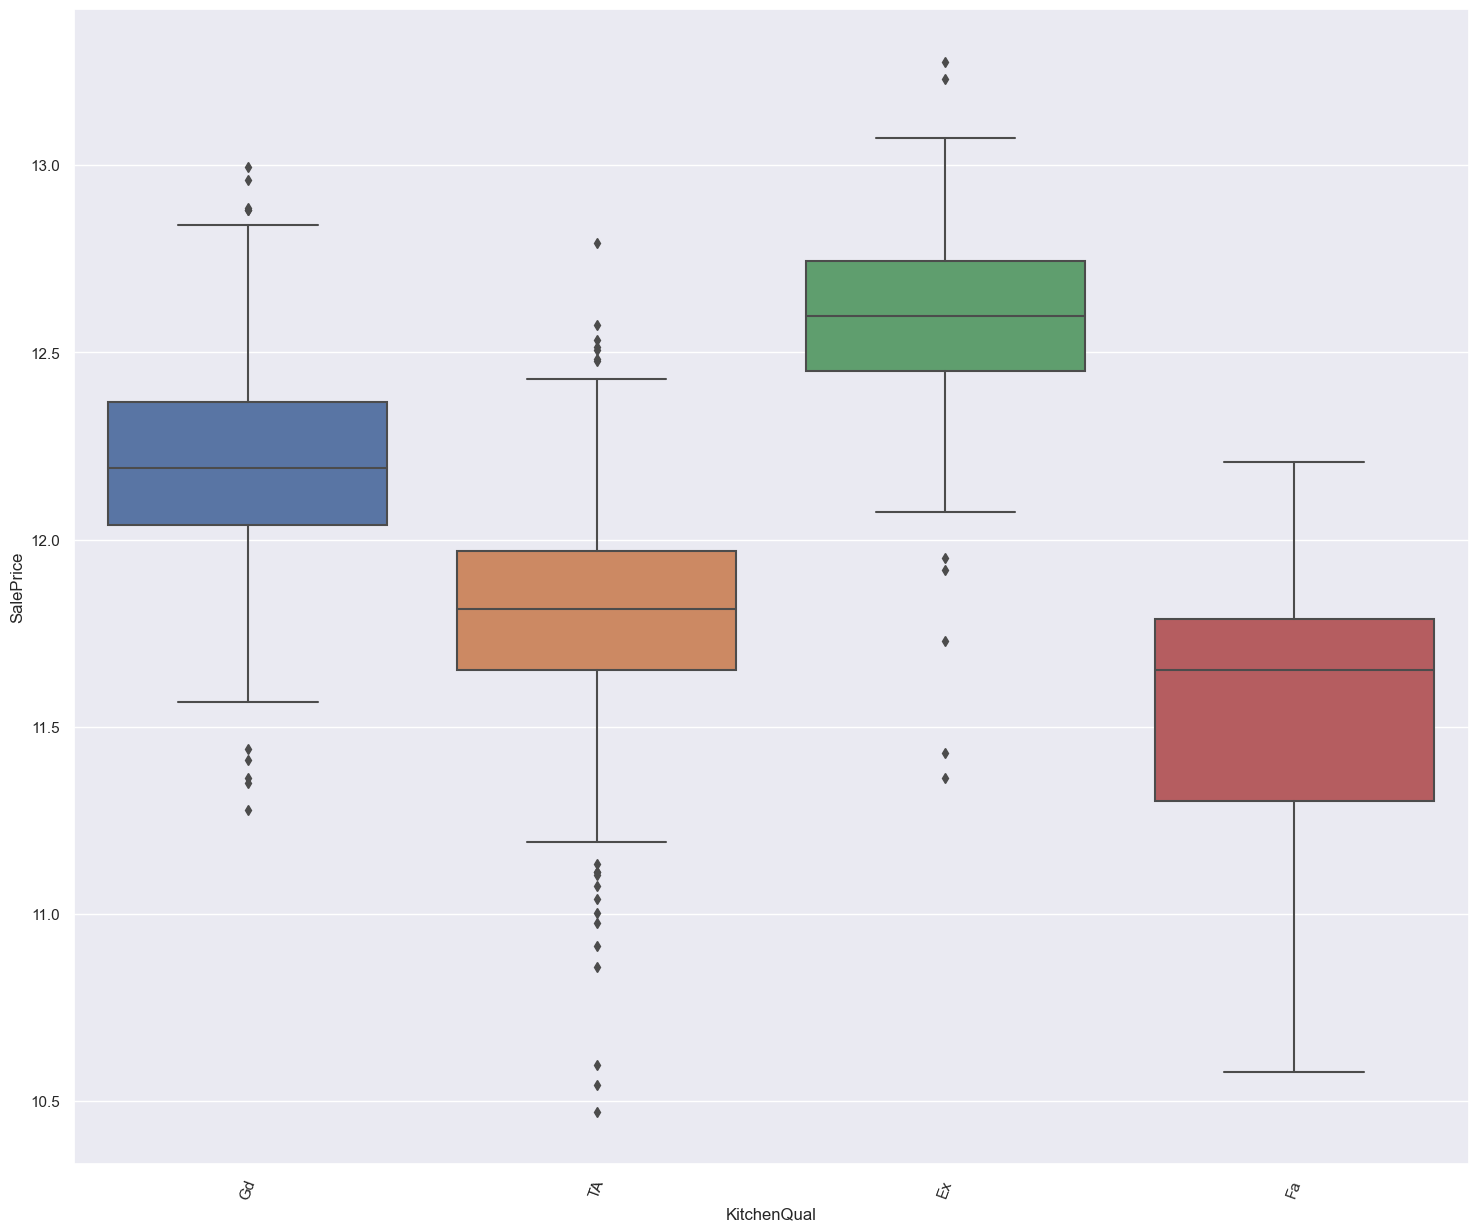

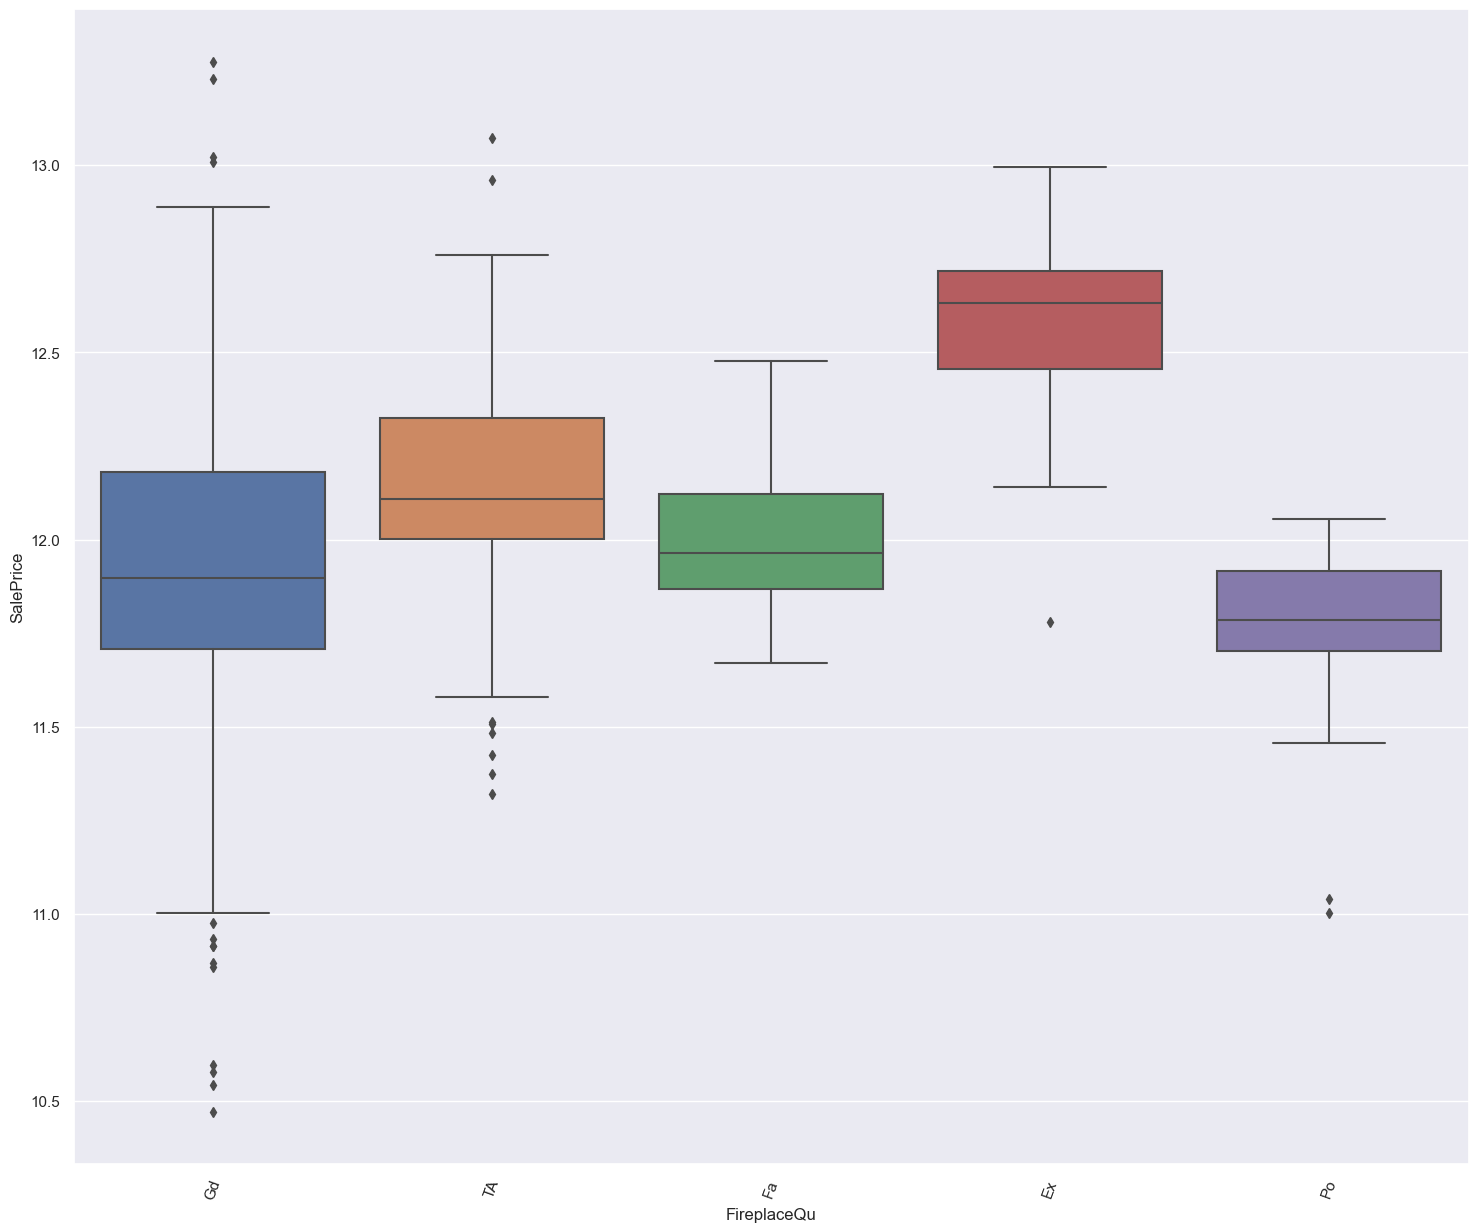

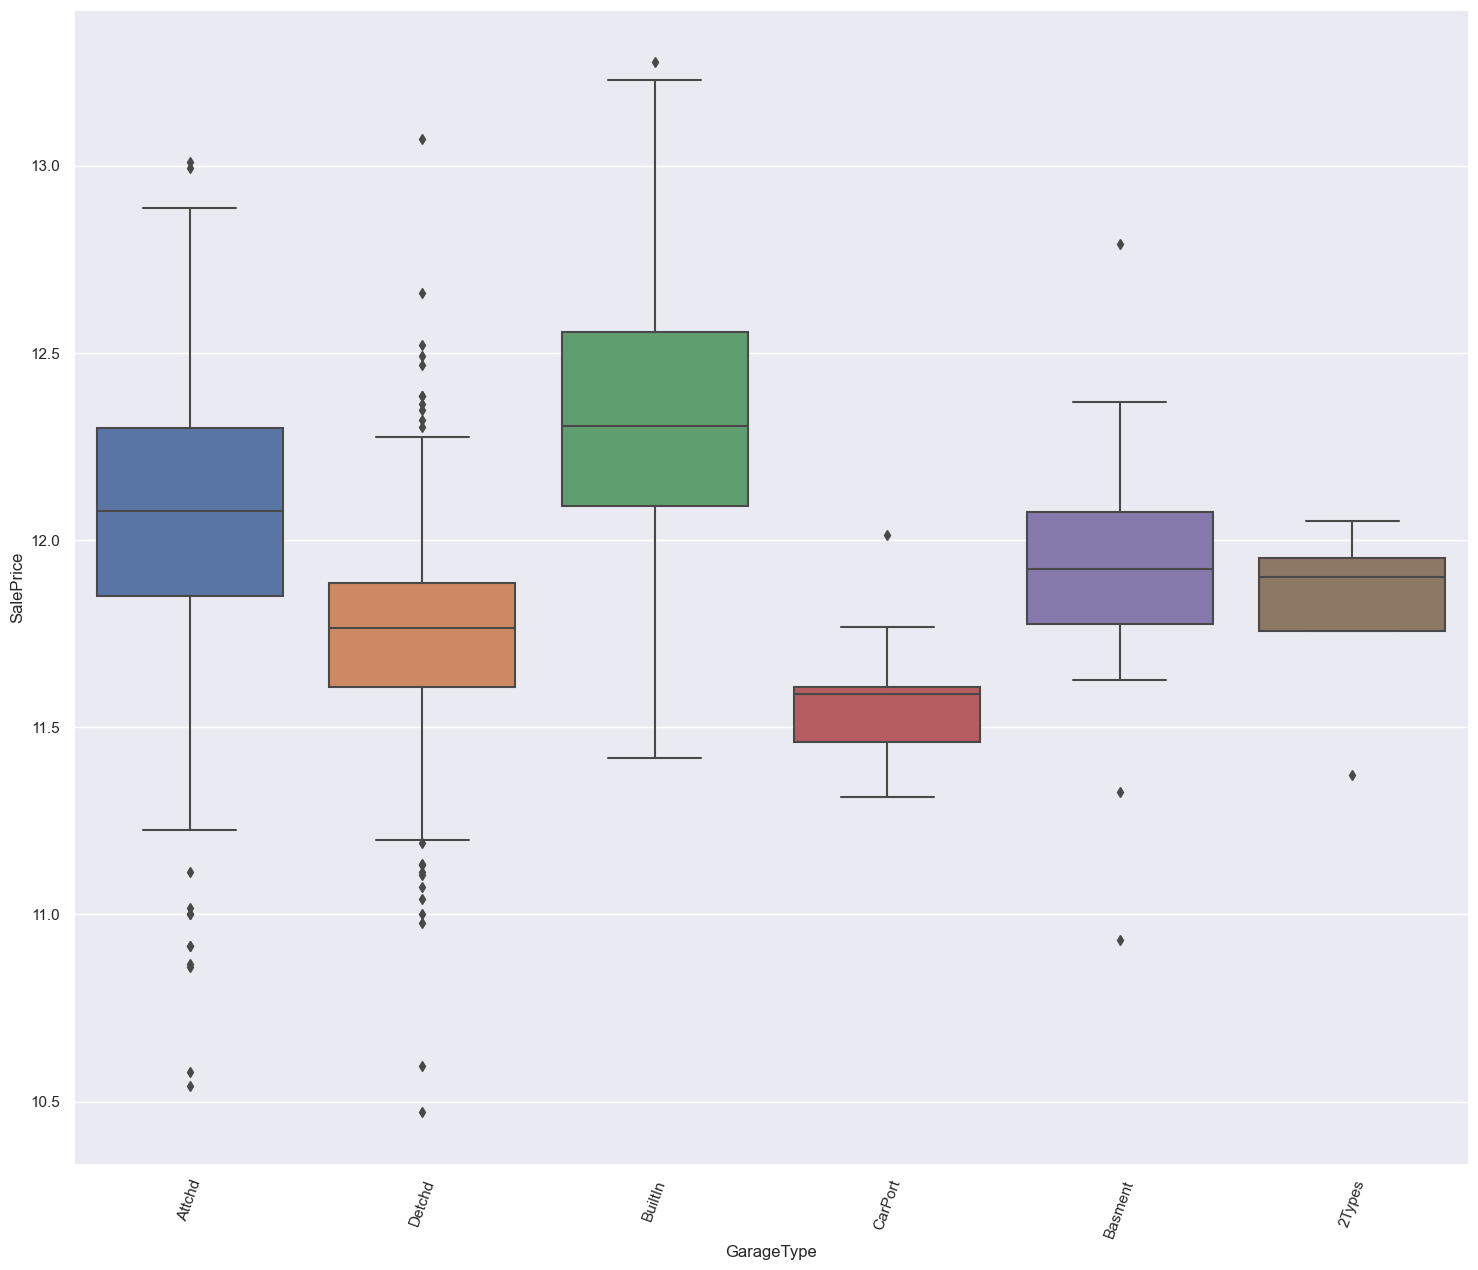

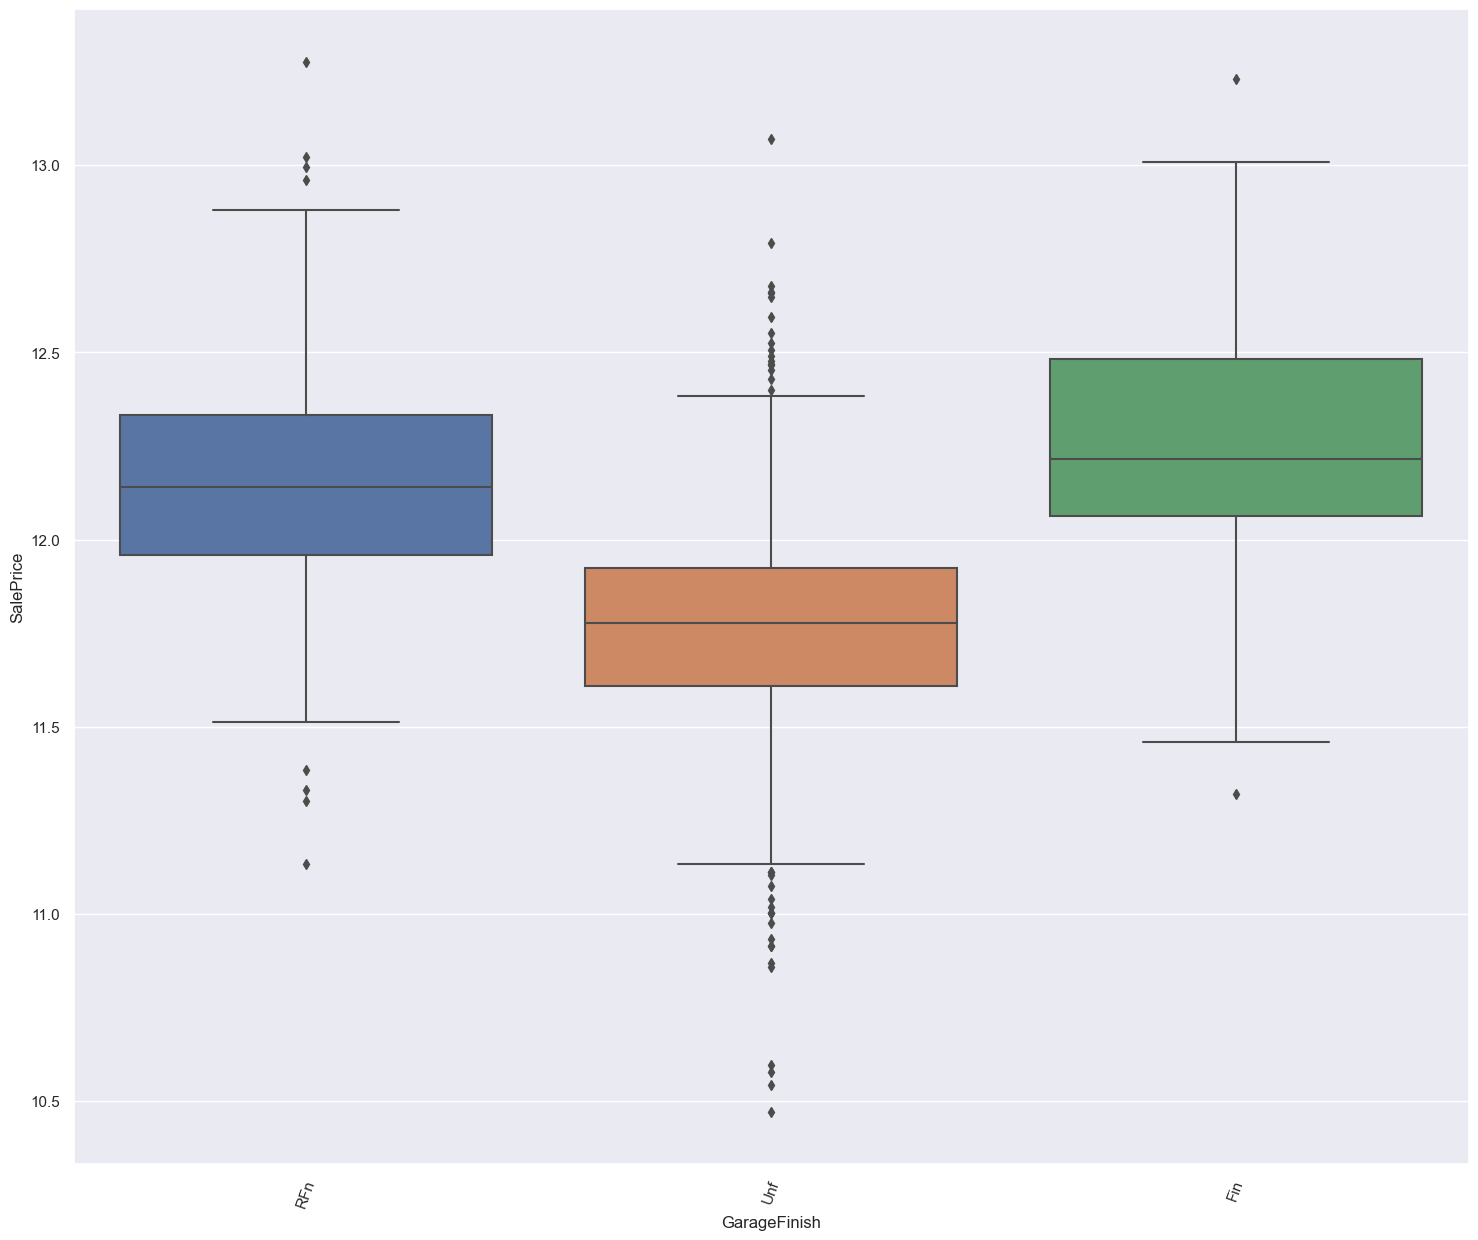

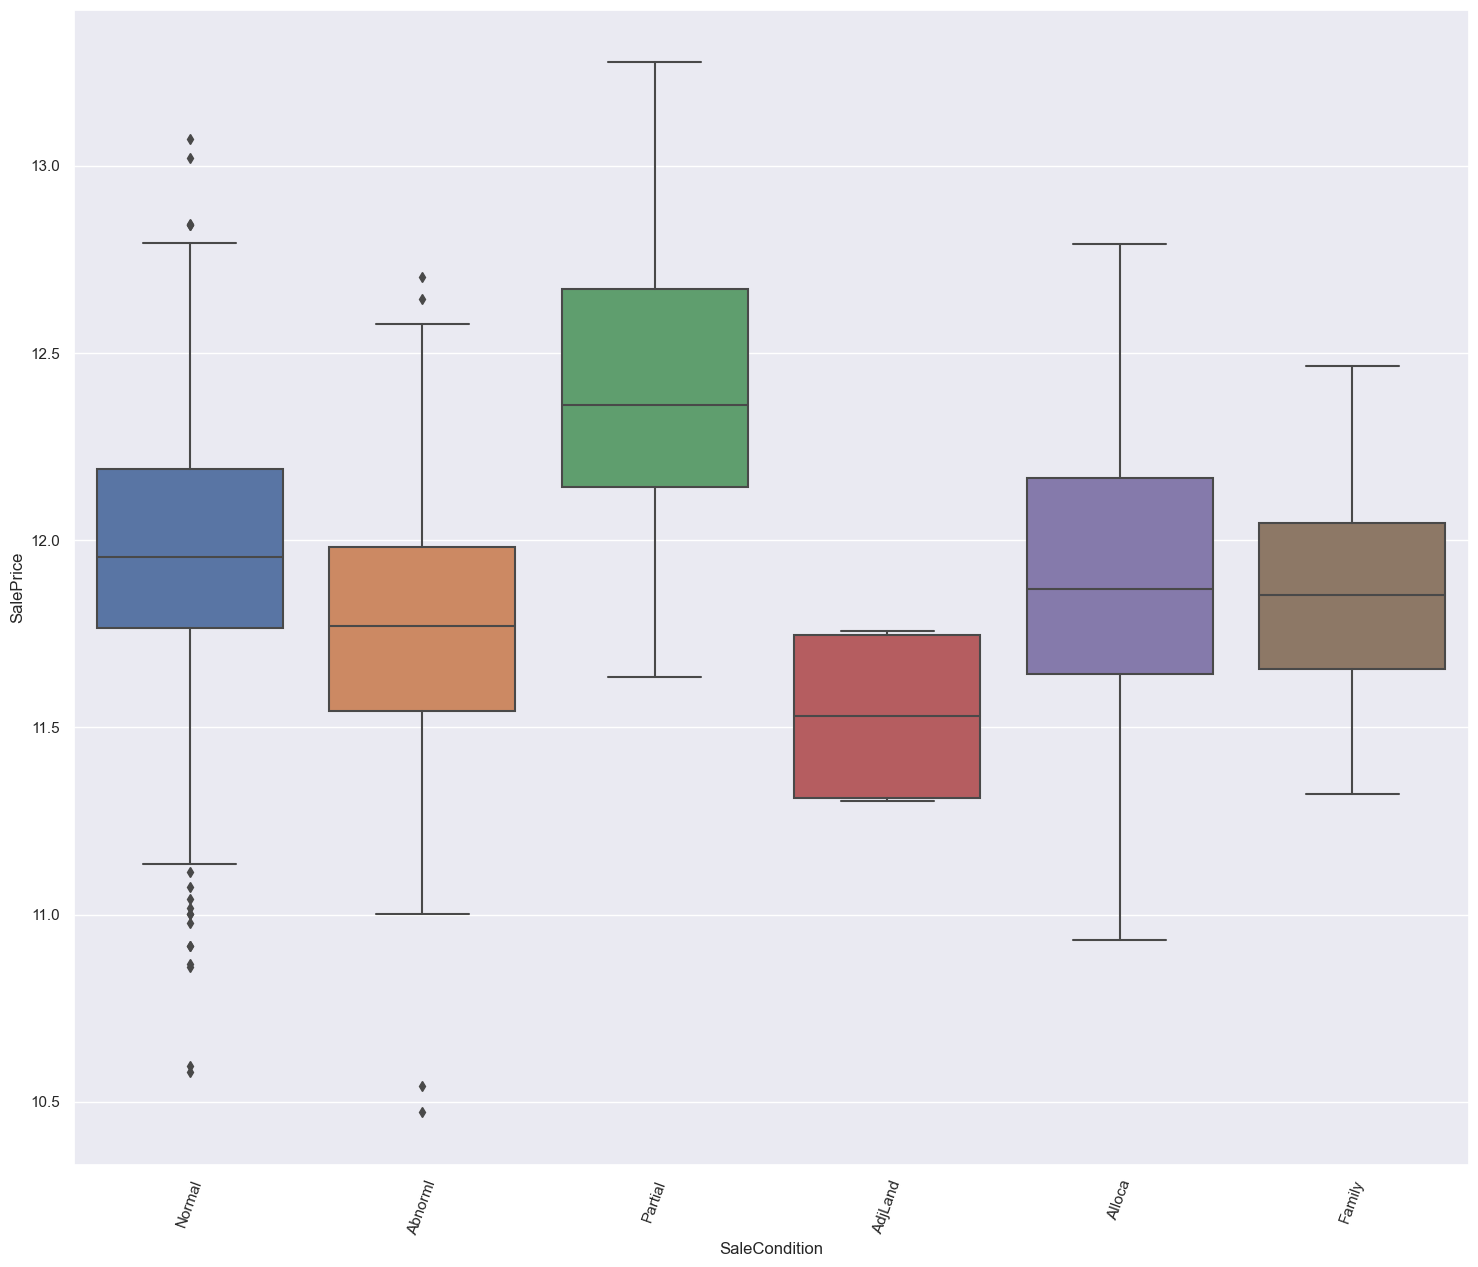

In [46]:
#Plotting all the Categorical Values against SalePrice
for column_cc in df_cat.columns:
    plt.figure(figsize=(18,15))
    sns.boxplot(x=column_cc, y="SalePrice", data=df)
    plt.xticks(rotation=70)

Text(0.5, 1.0, 'Overall Condition')

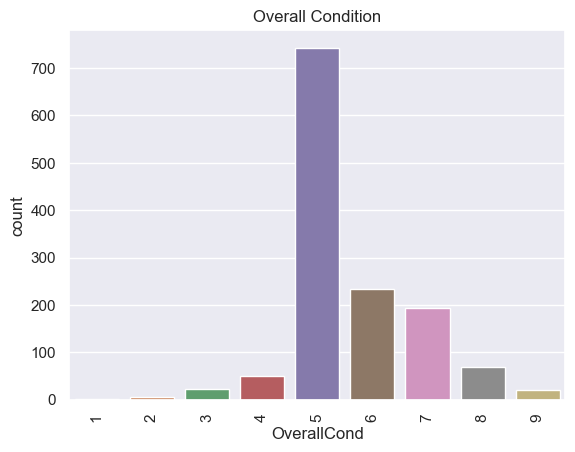

In [47]:
sns.countplot(x='OverallCond', data=df).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

5 is the most - overall condition

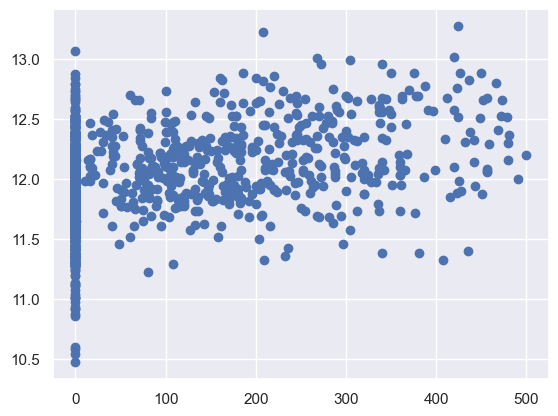

In [48]:
#scatterplot between Masonry veneer area in square feet and saleprice
plt.scatter(df['MasVnrArea'],df['SalePrice'])

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

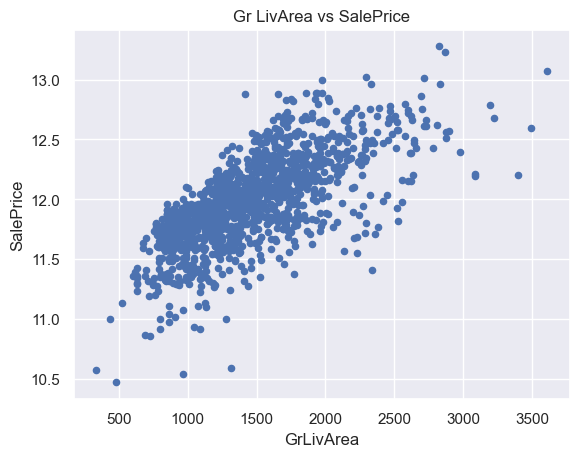

In [49]:
data_sale_gr = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data_sale_gr.plot.scatter(x='GrLivArea', y='SalePrice');
plt.title('Gr LivArea vs SalePrice')

### correlations among numerical variables

In [50]:
cor = df_num.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Remodel,BuildingAge,OldOrNewGarage
MSSubClass,1.000000,-0.405376,-0.397427,0.070089,-0.059391,0.020093,-0.064702,-0.128767,-0.239416,-0.242641,0.319437,0.116995,0.016456,0.156201,0.183208,-0.027283,0.061704,-0.023486,-0.031218,-0.094225,-0.015582,0.008411,-0.050587,-0.054201,-0.050102,0.042893
LotFrontage,-0.405376,1.000000,0.581226,0.188807,-0.045737,0.153276,0.105163,0.133556,0.279573,0.335493,0.051660,0.291570,0.025286,0.158504,0.042914,0.246826,0.294024,0.200843,0.264322,0.296085,0.081047,0.124244,0.334003,-0.045437,-0.067400,0.080887
LotArea,-0.397427,0.581226,1.000000,0.172527,-0.008636,0.098137,0.137308,0.085955,0.277499,0.387657,0.121366,0.392830,0.048440,0.191054,0.100064,0.302582,0.372119,0.300581,0.261764,0.292057,0.147251,0.147144,0.384554,0.008973,-0.044752,-0.009015
OverallQual,0.070089,0.188807,0.172527,1.000000,-0.086736,0.369386,0.176045,0.296806,0.502361,0.420863,0.281825,0.554572,0.084777,0.544194,0.244441,0.118849,0.390070,0.371102,0.585051,0.534443,0.205244,0.354445,0.809730,-0.096550,-0.550262,0.564986
OverallCond,-0.059391,-0.045737,-0.008636,-0.086736,1.000000,-0.127807,-0.018578,-0.140643,-0.162294,-0.140789,0.028800,-0.072387,-0.040521,-0.207615,-0.052195,0.017124,-0.050377,-0.023856,-0.176648,-0.140065,-0.004952,-0.040731,-0.023615,0.316899,-0.074238,-0.289757
MasVnrArea,0.020093,0.153276,0.098137,0.369386,-0.127807,1.000000,0.226743,0.081849,0.315361,0.297640,0.103463,0.300180,0.111005,0.240571,0.168203,0.124798,0.242148,0.221924,0.340584,0.338354,0.106218,0.172456,0.386571,-0.163810,-0.159427,0.190024
BsmtFinSF1,-0.064702,0.105163,0.137308,0.176045,-0.018578,0.226743,1.000000,-0.560715,0.423210,0.343971,-0.193497,0.066459,0.645183,0.032156,-0.032317,-0.098614,-0.032392,0.200614,0.182716,0.221812,0.184313,0.063988,0.341761,-0.126176,-0.110444,0.001884
BsmtUnfSF,-0.128767,0.133556,0.085955,0.296806,-0.140643,0.081849,-0.560715,1.000000,0.436398,0.308217,0.002531,0.229538,-0.428744,0.263288,-0.054122,0.150119,0.233330,0.043306,0.205356,0.176296,-0.032369,0.133835,0.210483,0.035017,-0.185340,0.346159
TotalBsmtSF,-0.239416,0.279573,0.277499,0.502361,-0.162294,0.315361,0.423210,0.436398,1.000000,0.766981,-0.245344,0.330524,0.277859,0.304095,-0.105188,0.056989,0.216432,0.282523,0.413703,0.435704,0.202019,0.217362,0.610535,-0.104383,-0.304352,0.330638
1stFlrSF,-0.242641,0.335493,0.387657,0.420863,-0.140789,0.297640,0.343971,0.308217,0.766981,1.000000,-0.272952,0.476899,0.202843,0.361807,-0.182995,0.138315,0.361958,0.364206,0.410681,0.434315,0.196024,0.183461,0.575924,-0.038679,-0.244060,0.217767


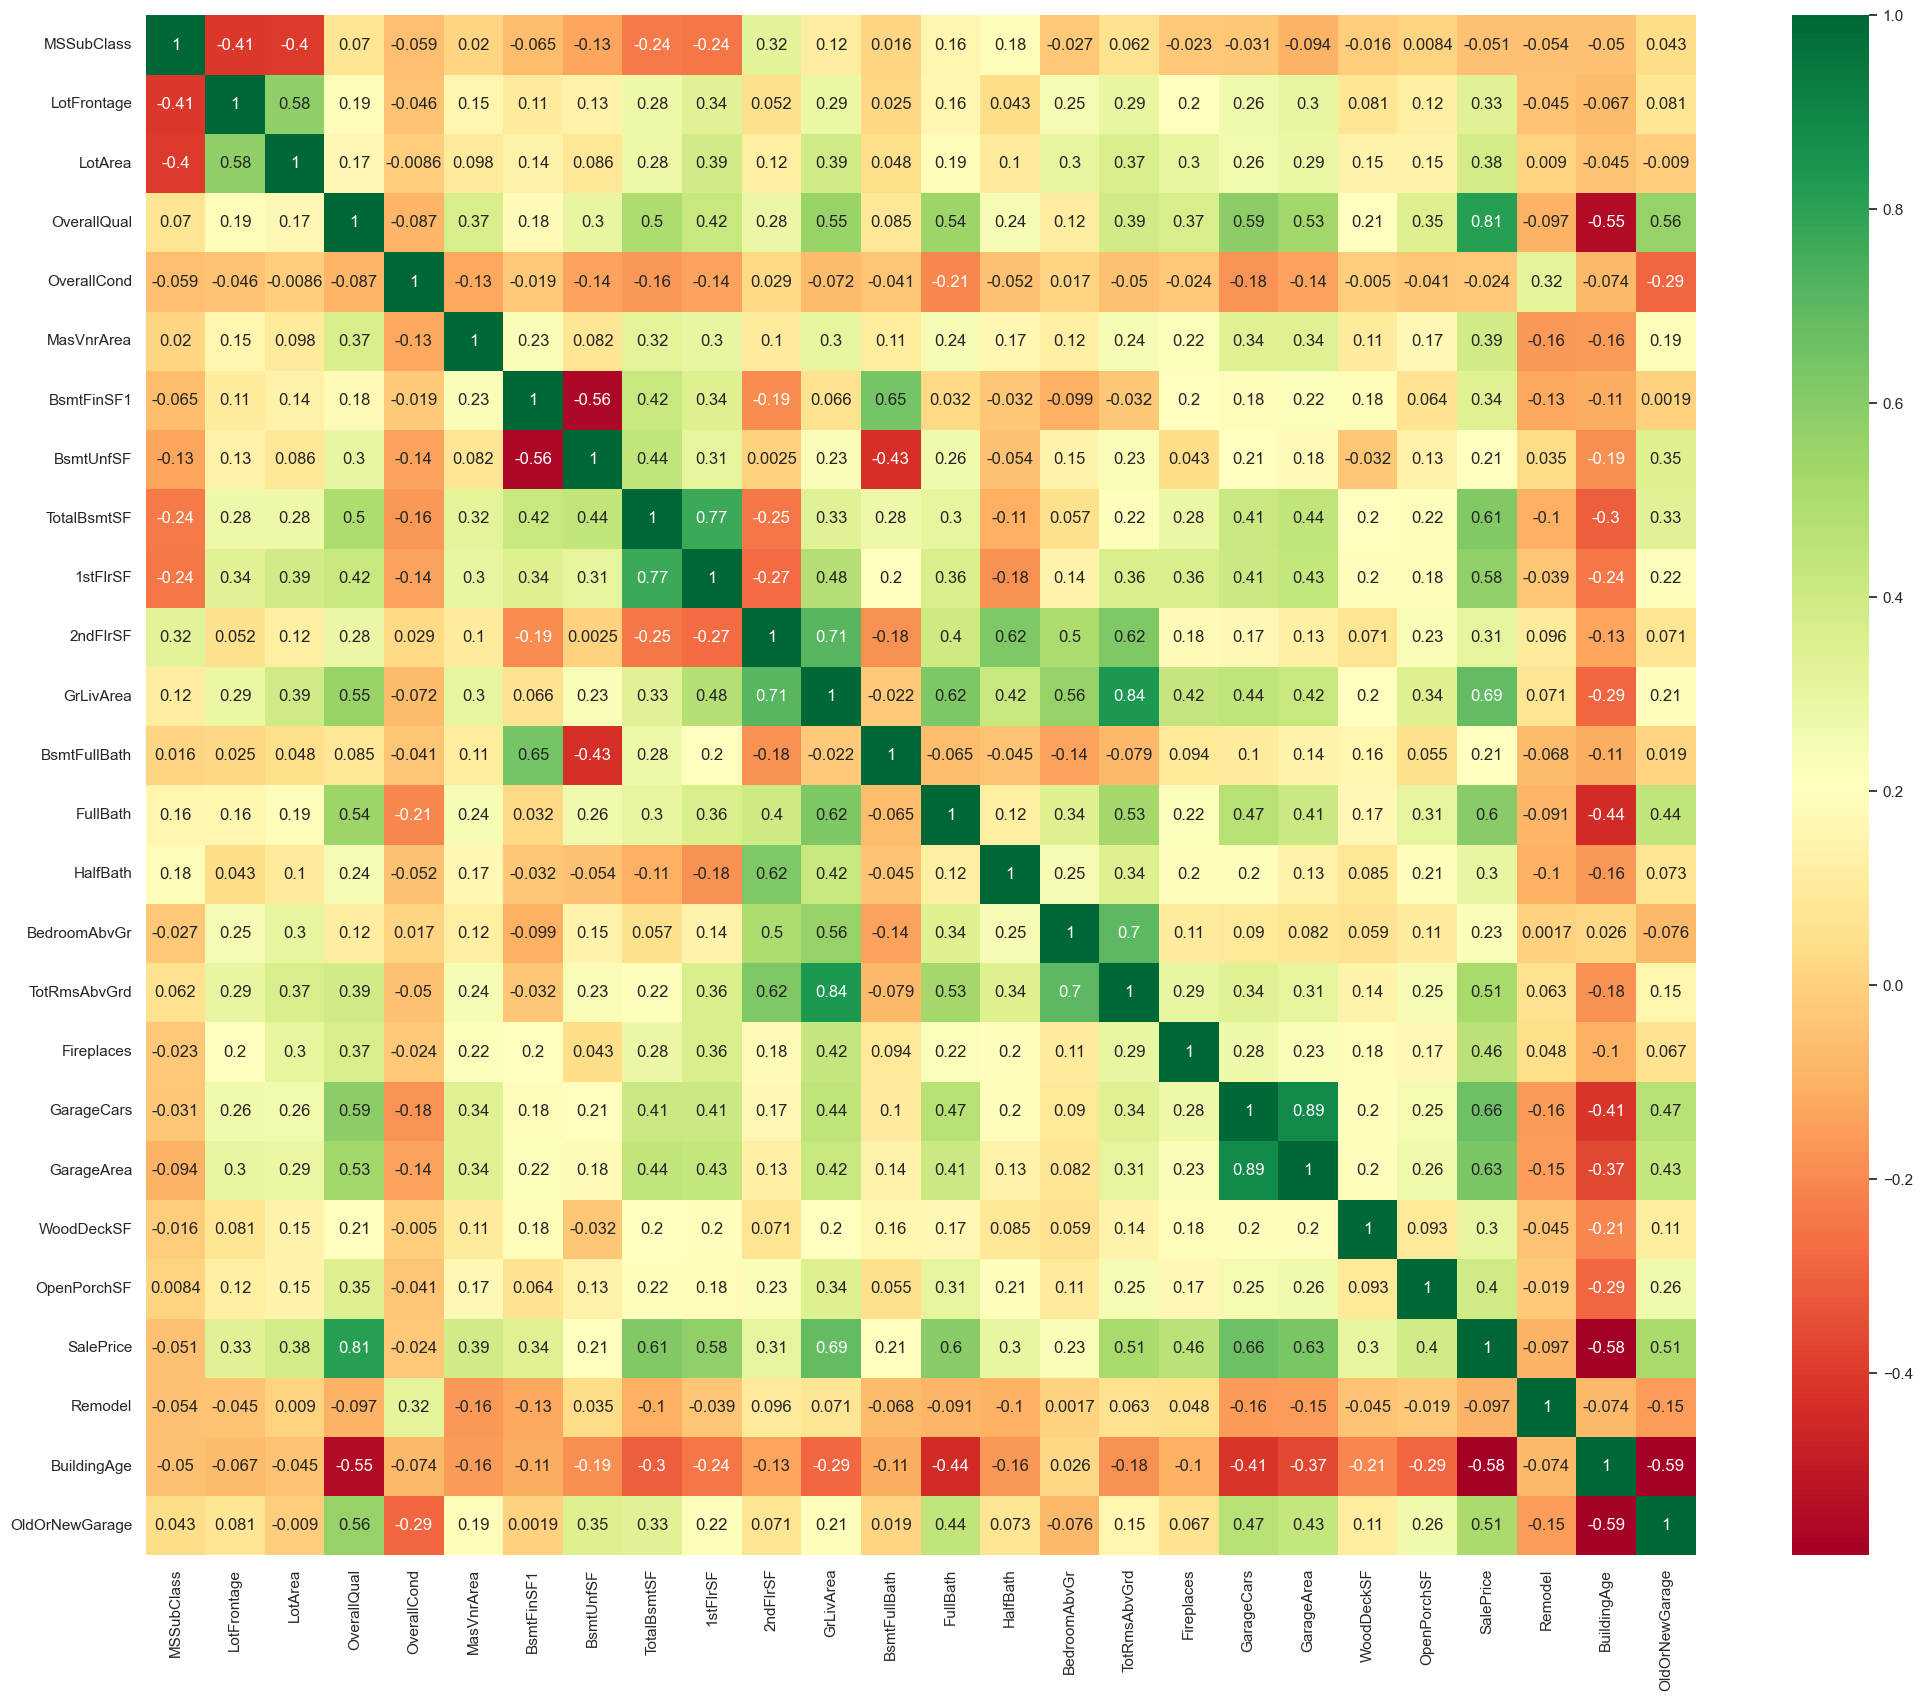

In [51]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

Observations:- 
   * Many columns are highly correlated with each other
   * Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.
   * As there is multicollinearity among predictors in our data, it would be good to use Ridge Regression.

### Dropping unnecessary columns
* SalePrice (Target variable) is highly positively correlated with OverallQual, GrLivArea
* SalePrice (Target variable) is positively correlated with TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, GarageCars, GarageArea

In [52]:
# Droping highly correlated variables
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'], axis=1,inplace=True)

## Data Preparation

* create dummy variables for all categorical features
* divide the data to train and test
* perform scaling
* divide data into dependent and independent variables

### Dummy Variable Creation

In [53]:
#Check which columns containg categorical data
categorical_df=df.select_dtypes(include=['object'])
categorical_df.head()

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleCondition
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Gd,Attchd,RFn,Normal
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn,Normal
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn,Normal
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf,Abnorml
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn,Normal


In [54]:
# Convert categorical value into Dummy variables (one hot encoding)
house_dummies=pd.get_dummies(categorical_df,drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0


In [55]:
## Check the dimensions
house_dummies.shape

(1338, 125)

### Splitting the data into train and test sets

In [56]:
#Separate the target variable as y which we want to predict
y = df.pop('SalePrice')
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [57]:
# X contains all independent variables use to make predictions except 'SalePrice' (target variable)
# drop categorical variables from the dataset and save as predictor variable X
X=df.drop(list(categorical_df.columns), axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,Remodel,BuildingAge,OldOrNewGarage
0,60,65.0,8450,7,5,196.0,706,150,856,854,1710,1,2,1,3,0,2,0,61,0,5,1
1,20,80.0,9600,6,8,0.0,978,284,1262,0,1262,0,2,0,3,1,2,298,0,0,31,0
2,60,68.0,11250,7,5,162.0,486,434,920,866,1786,1,2,1,3,1,2,0,42,1,6,1
3,70,60.0,9550,7,5,0.0,216,540,756,756,1717,1,1,0,3,1,3,0,35,1,36,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1053,2198,1,2,1,4,1,3,192,84,0,8,1


In [58]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [59]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,Remodel,BuildingAge,OldOrNewGarage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,150,856,854,1710,1,2,1,3,0,2,0,61,0,5,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,284,1262,0,1262,0,2,0,3,1,2,298,0,0,31,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,434,920,866,1786,1,2,1,3,1,2,0,42,1,6,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,540,756,756,1717,1,1,0,3,1,3,0,35,1,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1053,2198,1,2,1,4,1,3,192,84,0,8,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,

In [60]:
# storing column names in cols
# scaling (the dataframe is converted to a numpy array)
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       ...
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=147)

In [61]:
# split into train and test
np.random.seed(0) # start random variable at same point always
X_train, X_test, y_train,  y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [62]:
print(X_train.shape)
print(y_train.shape)

(936, 147)
(936,)


### Scaling numerical columns

In [63]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'Remodel',
 'BuildingAge',
 'OldOrNewGarage',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighbo

In [64]:
#Scaling 
from sklearn.preprocessing import StandardScaler

#Create a scaling instance
scaler=StandardScaler()

In [65]:
## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model Building and Evaluation

In [66]:
# defining function which will calculate metrics and display values in the table for Train and Test to ease comparison 
from tabulate import tabulate

def Cal_Metric(y_trn, y_trn_p, y_tst, y_tst_p):
    
    r2_metric = rss_metric = mse_metric = metric = metric_vals = []
    
    r2_metric = [round (r2_score(y_trn, y_trn_p), 2), round (r2_score(y_tst, y_tst_p),2)]
    rss_metric = [round(np.sum(np.square(y_trn - y_trn_p)),7), round(np.sum(np.square(y_tst - y_tst_p)),7)]
    mse_metric = [round (mean_squared_error(y_trn, y_trn_p),7), round(mean_squared_error(y_tst, y_tst_p),7)]
  
    metric = [['R2'] + r2_metric, ['RSS'] + rss_metric, ['MSE'] + mse_metric]
    # table
    print( tabulate(metric, headers=["Metric", "Train", "Test"], tablefmt="grid"))
    
    metric_vals.extend(r2_metric)
    metric_vals.extend(rss_metric)
    metric_vals.extend(mse_metric)
    
    return (metric_vals)                                                                
    

In [67]:
Metric_MLR = Metric_Reg = Metric_Las = []

In [68]:
# Instantiating LR Model
lm = LinearRegression()

# Fitting a line
lm.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
Metric_MLR = Cal_Metric(y_train, y_pred_train, y_test, y_pred_test)

+----------+-----------+--------------+
| Metric   |     Train |         Test |
+==========+===========+==============+
| R2       | 0.92      | -1.52216e+25 |
+----------+-----------+--------------+
| RSS      | 9.9457    |  8.72047e+26 |
+----------+-----------+--------------+
| MSE      | 0.0106258 |  2.16927e+24 |
+----------+-----------+--------------+


### Ridge

In [70]:
# list of alphas to tune
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
           4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]} 
folds = 5

ridge = Ridge()

# cross validation
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 100}
-0.08946292957459291


In [72]:
# lets now build Ridge Model using alpha = 100
alpha = 100
ridgeModel1 = Ridge(alpha=alpha)
ridgeModel1.fit(X_train, y_train)

y_pred_train_rig1 = ridgeModel1.predict(X_train)
y_pred_test_rig1 = ridgeModel1.predict(X_test)
Metric_Rig1 = Cal_Metric(y_train, y_pred_train_rig1, y_test, y_pred_test_rig1)

+----------+------------+-----------+
| Metric   |      Train |      Test |
+==========+============+===========+
| R2       |  0.92      | 0.91      |
+----------+------------+-----------+
| RSS      | 10.6407    | 5.19892   |
+----------+------------+-----------+
| MSE      |  0.0113683 | 0.0129326 |
+----------+------------+-----------+


In [73]:
cv_results_rig1 = pd.DataFrame(ridge_model_cv.cv_results_)
# cv_results_rig

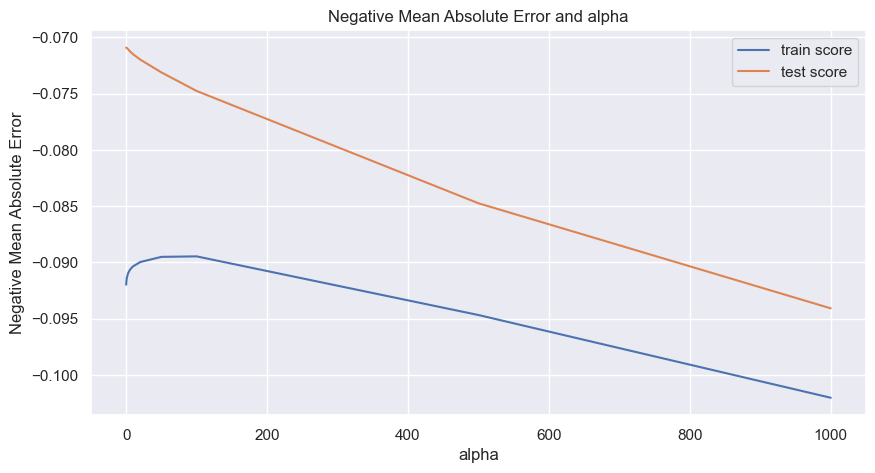

In [74]:
# Plotting the mean test and train scores
plt.figure(figsize=(10, 5))
plt.plot(cv_results_rig1['param_alpha'], cv_results_rig1['mean_test_score'])
plt.plot(cv_results_rig1['param_alpha'], cv_results_rig1['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [75]:
# Let's use alpha double the earlier value as requested in the assignment 
ridgeModel2 = Ridge(alpha = 200)
ridgeModel2.fit(X_train, y_train)
y_pred_train_rig2 = ridgeModel2.predict(X_train)
y_pred_test_rig2 = ridgeModel2.predict(X_test)
Metric_Rig2 = Cal_Metric(y_train, y_pred_train_rig2, y_test, y_pred_test_rig2)

+----------+------------+-----------+
| Metric   |      Train |      Test |
+==========+============+===========+
| R2       |  0.91      | 0.91      |
+----------+------------+-----------+
| RSS      | 11.2849    | 5.38474   |
+----------+------------+-----------+
| MSE      |  0.0120565 | 0.0133949 |
+----------+------------+-----------+


After using double the optimial alpha value, R2 score descresed and RSS score increased

### Lasso Regression

In [76]:
lassoModel1 = Lasso()

# cross validation
model_cv_las1 = GridSearchCV(estimator = lassoModel1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_las1.fit(X_train, y_train)
model_cv_las1.best_params_["alpha"]

Fitting 5 folds for each of 29 candidates, totalling 145 fits


0.001

In [77]:
cv_results_las1 = pd.DataFrame(model_cv_las1.cv_results_)
# cv_results_las    

In [78]:
cv_results_las1.mean_train_score.max(), cv_results_las1.mean_train_score.min(), cv_results_las1.mean_train_score.mean()


(-0.07092934853752315, -0.2900419265388165, -0.24751902074919904)

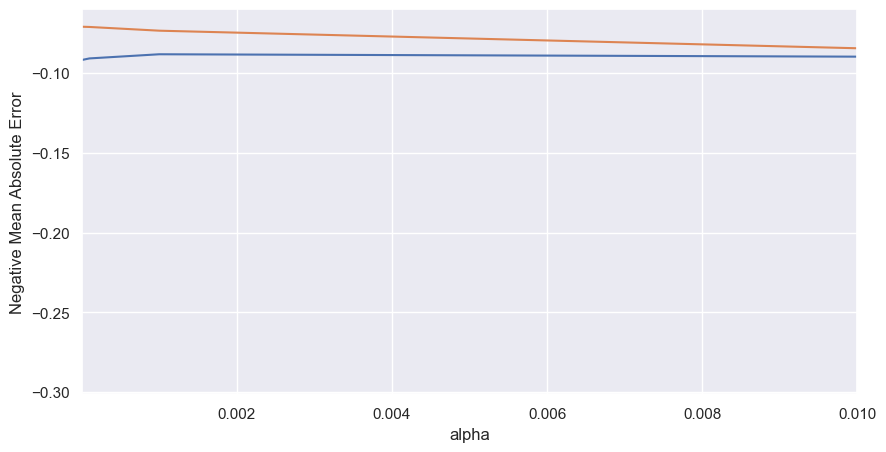

In [79]:
# Plotting the mean test and train scores
plt.figure(figsize=(10, 5))
plt.plot(cv_results_las1['param_alpha'], cv_results_las1['mean_test_score'])
plt.plot(cv_results_las1['param_alpha'], cv_results_las1['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0.00001, 0.01) # not plotting all alpha values as it will show straight line for alpha > 0.0001
plt.show()

In [80]:
# lets use the best identified alpha value = 0.0001

lassoModel1 = Lasso(alpha=0.001)
        
lassoModel1.fit(X_train, y_train)

y_pred_train_las1 = lassoModel1.predict(X_train)
y_pred_test_las1 = lassoModel1.predict(X_test)

Metric_Las1 = Cal_Metric(y_train, y_pred_train_las1, y_test, y_pred_test_las1)

+----------+------------+-----------+
| Metric   |      Train |      Test |
+==========+============+===========+
| R2       |  0.92      | 0.91      |
+----------+------------+-----------+
| RSS      | 10.4038    | 5.12385   |
+----------+------------+-----------+
| MSE      |  0.0111151 | 0.0127459 |
+----------+------------+-----------+


In [81]:
# lets use alpha value = 0.0002

lassoModel2 = Lasso(alpha=0.0002)
        
lassoModel2.fit(X_train, y_train)

y_pred_train_las2 = lassoModel2.predict(X_train)
y_pred_test_las2 = lassoModel2.predict(X_test)

Metric_Las2 = Cal_Metric(y_train, y_pred_train_las2, y_test, y_pred_test_las2)

+----------+-----------+-----------+
| Metric   |     Train |      Test |
+==========+===========+===========+
| R2       | 0.92      | 0.91      |
+----------+-----------+-----------+
| RSS      | 9.9305    | 4.96613   |
+----------+-----------+-----------+
| MSE      | 0.0106095 | 0.0123536 |
+----------+-----------+-----------+


* Linear Regresion Model with overfitting problem which is getting solved with Ridge and Lasso
* Both Ridge and Lasso with descent metric but Lasso Model is with best scores

In [82]:
# Coefficients view post regularization 

betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear_Model'] = lm.coef_
betas['Ridge_Model_1'] = ridgeModel1.coef_
betas['Ridge_Model_2'] = ridgeModel2.coef_
betas['Lasso_Model_1'] = lassoModel1.coef_
betas['Lasso_Model_2'] = lassoModel2.coef_

In [83]:
pd.set_option('display.max_rows', None)
betas.head(20)

,Linear_Model,Ridge_Model_1,Ridge_Model_2,Lasso_Model_1,Lasso_Model_2
MSSubClass,-0.009613,-0.008951,-0.007699,-0.010731,-0.012010
LotFrontage,0.001805,0.008168,0.009600,0.006004,0.004555
LotArea,0.022903,0.024315,0.023987,0.021113,0.022641
OverallQual,0.055824,0.059924,0.055568,0.071237,0.062522
OverallCond,0.048212,0.040970,0.036094,0.046868,0.047849
MasVnrArea,-0.003436,0.001505,0.004231,0.000000,-0.002016
BsmtFinSF1,0.022759,0.027901,0.027092,0.027130,0.022617
BsmtUnfSF,-0.000587,0.005393,0.006320,-0.000000,-0.002749
TotalBsmtSF,0.058489,0.049408,0.044762,0.048805,0.055571
2ndFlrSF,-0.003916,0.015134,0.015611,0.000000,0.000000


In [84]:
# finding out number of features used in advanced regression 

MLR_Predictors = round (len (list(betas[betas['Linear_Model'] != 0.0].index)), 2)
Rig_Model1_Predictors = round (len (list(betas[betas["Ridge_Model_1"] != 0.0].index)), 2)
Rig_Model2_Predictors = round (len (list(betas[betas["Ridge_Model_2"] != 0.0].index)), 2)
Las_Model1_Predictors = round (len (list(betas[betas["Lasso_Model_1"] != 0.0].index)), 2)
Las_Model2_Predictors = round (len (list(betas[betas["Lasso_Model_2"] != 0.0].index)), 2)

In [85]:
# comparing metrics across models 

Metric_Table = {'Metric': ['Predictor Count','R2 (Train)', 'R2 (Test)', 'RSS (Train)', 'RSS (Test)', 'MSE (Train)', 'MSE (Test)'], 'Linear Regression': [MLR_Predictors] +  Metric_MLR}

LR_df = pd.DataFrame(Metric_Table, columns=['Metric', 'Linear Regression'])
Rig1_series = pd.Series([Rig_Model1_Predictors] + Metric_Rig1, name = "Ridge Regression Model-1")
Rig2_series = pd.Series([Rig_Model2_Predictors] + Metric_Rig2, name = "Ridge Regression Model-2")
Las1_series = pd.Series([Las_Model1_Predictors] + Metric_Las1, name = "Lasso Regression Model-1")
Las2_series = pd.Series([Las_Model2_Predictors] + Metric_Las2, name = "Lasso Regression Model-2")
FinalMetric = pd.concat([LR_df, Rig1_series, Rig2_series, Las1_series, Las2_series], axis = 1)
FinalMetric

,Metric,Linear Regression,Ridge Regression Model-1,Ridge Regression Model-2,Lasso Regression Model-1,Lasso Regression Model-2
0,Predictor Count,1.470000e+02,143.000000,143.000000,103.000000,127.000000
1,R2 (Train),9.200000e-01,0.920000,0.910000,0.920000,0.920000
2,R2 (Test),-1.522160e+25,0.910000,0.910000,0.910000,0.910000
3,RSS (Train),9.945704e+00,10.640740,11.284924,10.403760,9.930503
4,RSS (Test),8.720470e+26,5.198923,5.384735,5.123846,4.966129
5,MSE (Train),1.062580e-02,0.011368,0.012056,0.011115,0.010609
6,MSE (Test),2.169271e+24,0.012933,0.013395,0.012746,0.012354


* Lasso is simple as covering lower number of predictors compare to Ridge
* Lasso Model 2 is simplest as with lowest number of predictors

In [86]:
# Top 5 features (positive coefficients) in Ridge Regression Model 1:

betas["Ridge_Model_1"].sort_values(ascending=False)[:5]

GrLivArea      0.069474
OverallQual    0.059924
TotalBsmtSF    0.049408
OverallCond    0.040970
GarageCars     0.037803
Name: Ridge_Model_1, dtype: float64

In [87]:
# Top 5 features (negative coefficients) in Ridge Regression Model 1:

betas["Ridge_Model_1"].sort_values(ascending=True)[:5]

BuildingAge            -0.022526
Neighborhood_OldTown   -0.020057
KitchenQual_TA         -0.019884
KitchenQual_Fa         -0.015657
Exterior1st_BrkComm    -0.014721
Name: Ridge_Model_1, dtype: float64

In [88]:
# Top 5 features (positive coefficients) in Ridge Regression Model 2:

betas["Ridge_Model_2"].sort_values(ascending=False)[:5]

GrLivArea      0.059128
OverallQual    0.055568
TotalBsmtSF    0.044762
GarageCars     0.036604
OverallCond    0.036094
Name: Ridge_Model_2, dtype: float64

In [89]:
# Top 5 features (negative coefficients) in Ridge Regression Model 2:

betas["Ridge_Model_2"].sort_values(ascending=True)[:5]

BuildingAge            -0.022193
Neighborhood_OldTown   -0.016929
KitchenQual_TA         -0.016283
KitchenQual_Fa         -0.013866
Exterior1st_BrkComm    -0.013615
Name: Ridge_Model_2, dtype: float64

In [90]:
# Top 5 features (positive coefficients) in Lasso Regression Model 1:

betas["Lasso_Model_1"].sort_values(ascending=False)[:5]

GrLivArea      0.103958
OverallQual    0.071237
TotalBsmtSF    0.048805
OverallCond    0.046868
GarageCars     0.039317
Name: Lasso_Model_1, dtype: float64

In [91]:
# Top 5 features (negative coefficients) in Lasso Regression Model 1:

betas["Lasso_Model_1"].sort_values(ascending=True)[:5]

KitchenQual_TA         -0.027450
KitchenQual_Gd         -0.023680
Neighborhood_OldTown   -0.020794
BuildingAge            -0.020169
KitchenQual_Fa         -0.018898
Name: Lasso_Model_1, dtype: float64

In [92]:
# Top 5 features (positive coefficients) in Lasso Regression Model 2:

betas["Lasso_Model_2"].sort_values(ascending=False)[:5]

GrLivArea      0.104581
MSZoning_RL    0.086465
MSZoning_RM    0.064517
OverallQual    0.062522
TotalBsmtSF    0.055571
Name: Lasso_Model_2, dtype: float64

In [93]:
# Top 5 features (negative coefficients) in Lasso Regression Model 2:

betas["Lasso_Model_2"].sort_values(ascending=True)[:5]

KitchenQual_TA         -0.041220
KitchenQual_Gd         -0.037831
Neighborhood_OldTown   -0.024614
KitchenQual_Fa         -0.024022
BuildingAge            -0.019906
Name: Lasso_Model_2, dtype: float64

In [94]:
FinalMetric

,Metric,Linear Regression,Ridge Regression Model-1,Ridge Regression Model-2,Lasso Regression Model-1,Lasso Regression Model-2
0,Predictor Count,1.470000e+02,143.000000,143.000000,103.000000,127.000000
1,R2 (Train),9.200000e-01,0.920000,0.910000,0.920000,0.920000
2,R2 (Test),-1.522160e+25,0.910000,0.910000,0.910000,0.910000
3,RSS (Train),9.945704e+00,10.640740,11.284924,10.403760,9.930503
4,RSS (Test),8.720470e+26,5.198923,5.384735,5.123846,4.966129
5,MSE (Train),1.062580e-02,0.011368,0.012056,0.011115,0.010609
6,MSE (Test),2.169271e+24,0.012933,0.013395,0.012746,0.012354
